This projects aims to classify the MNIST dataset by using different machine learning models: RidgeClassifier, LogisticRegression, DecisionTree, RandomForest, Support Vector Machine (SVM) and by implementing a Convolutional Neural Network (CNN). The models are trained on a training set and verified on a test set. In order to analize the different performances of the methods, some evaluation metrics are used (such as confusion matrix, ROC curve). At the end of the project, the different accuracies and precisions are compared in a final plot, to identify which model can better classify the MNIST dataset.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(data_id=554) # https://www.openml.org/d/554

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
type(mnist.data), type(mnist.categories), type(mnist.feature_names), type(mnist.target)

(pandas.core.frame.DataFrame, NoneType, list, pandas.core.series.Series)

In [3]:
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [4]:
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

The dataset contains 70.000 images 28x28(784)pixels

PREVIEW OF SOME IMAGES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

We can work with a Numpay array, by converting the starting pandas dataframe

In [5]:
mnist_data_array = mnist.data.values

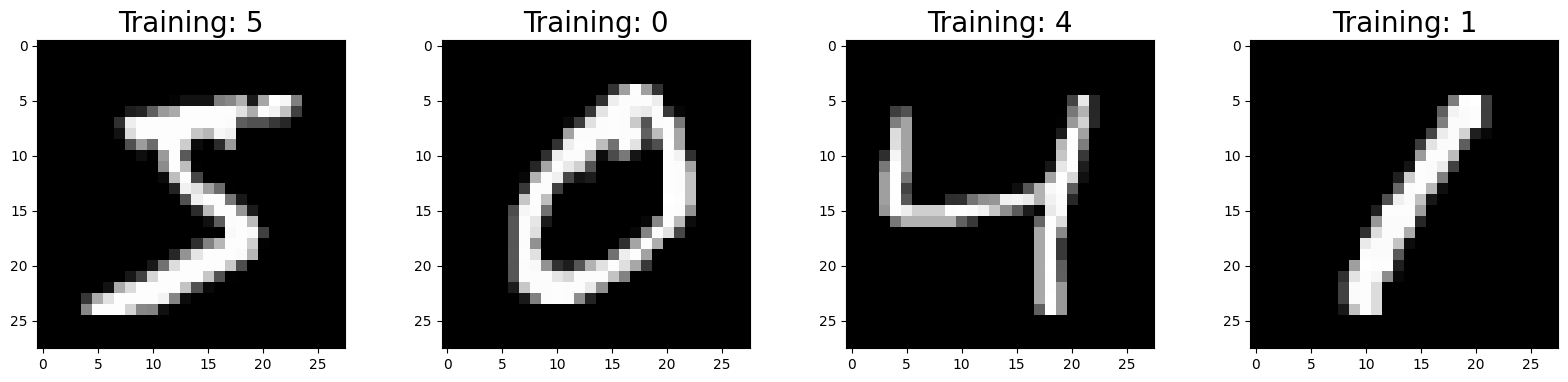

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(mnist_data_array[0:4], mnist.target[0:4])):
    plt.subplot(1, 4, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
    plt.title('Training: ' + label, fontsize=20)

plt.show()

Data preparation: the dataset is normalized by dividing each pixel by 255. This ensures that the pixel values are between 0 and 1 (the pixel values of grayscale images vary from 0 to 255).

In [ ]:
mnist_data_array = mnist_data_array.astype('float32') / 255

In [ ]:
mnist.target.astype('int')

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64



```
# Questo è formattato come codice
```



TEST AND TRAINING SET SPLITTING

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data,
                                                    mnist.target.astype('int'), #targets str to int convert
                                                   test_size=1/10.0,
                                                   random_state=0)

In [7]:
x_train.shape, x_test.shape

((63000, 784), (7000, 784))

If we want to be sure that the different classes are evenly distributed we can plot a histogram of the labels in both test and training set

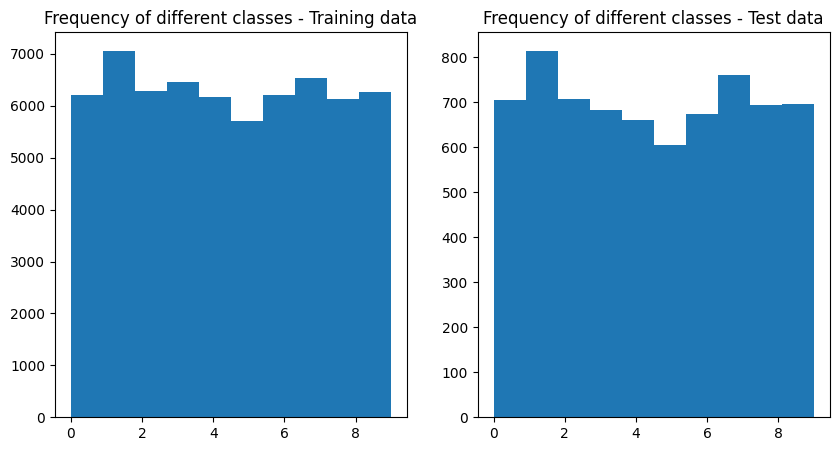

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequency of different classes - Test data');

# MNIST CLASSIFICATION WITH THE RIDGE CLASSIFIER METHOD

This classifier first converts the target values into {-1, 1} and then treats the problem as a regression task (multi-output regression in the multiclass case)


Model inizialization

In [ ]:
from sklearn.linear_model import RidgeClassifier

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
clf = RidgeClassifier()


Model training

In [ ]:
clf.fit(x_train, y_train)

RidgeClassifier()

Predictions on the test set: the trained model can be used to predict test data using the .predict(x_test) method.

In [ ]:
predictions = clf.predict(x_test)

In [ ]:
for i in range(50):
    print(f"Predicted: {predictions[i]}, Actual: {y_test.iloc[i]}")

Predicted: 0, Actual: 0
Predicted: 4, Actual: 4
Predicted: 1, Actual: 1
Predicted: 2, Actual: 2
Predicted: 4, Actual: 7
Predicted: 4, Actual: 9
Predicted: 7, Actual: 7
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 7, Actual: 7
Predicted: 1, Actual: 1
Predicted: 3, Actual: 3
Predicted: 4, Actual: 4
Predicted: 2, Actual: 2
Predicted: 6, Actual: 6
Predicted: 4, Actual: 4
Predicted: 6, Actual: 6
Predicted: 7, Actual: 7
Predicted: 7, Actual: 3
Predicted: 3, Actual: 3
Predicted: 7, Actual: 7
Predicted: 0, Actual: 0
Predicted: 3, Actual: 5
Predicted: 7, Actual: 7
Predicted: 6, Actual: 6
Predicted: 5, Actual: 5
Predicted: 6, Actual: 6
Predicted: 4, Actual: 4
Predicted: 7, Actual: 7
Predicted: 4, Actual: 4
Predicted: 3, Actual: 3
Predicted: 5, Actual: 5
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 4, Actual: 4
Predicted: 6, Actual: 6
Predicted: 3, Actual: 3
Predicted: 9, Actual: 9
Predicted: 4, Actual: 4
Predicted: 5, Actual: 5
Predicted: 8, Actual: 8
Predicted: 0, Ac

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

# Make predictions on the training set
train_predictions = clf.predict(x_train)

# Accuracy calculation on the training set
train_accuracy = accuracy_score(y_train, train_predictions.round())
print(f"Training Accuracy: {train_accuracy}")

# Precision calculation on the training set
train_precision = precision_score(y_train, train_predictions.round(), average='weighted')
print(f"Training Precision: {train_precision}")

Training Accuracy: 0.857920634920635
Training Precision: 0.8590055749977836


In [ ]:
from sklearn.metrics import accuracy_score, precision_score

# Accuracy calculation on the test set
accuracy = accuracy_score(y_test, predictions.round())
print(f"Accuracy: {accuracy}")

# Precision calculation on the test set
precision = precision_score(y_test, predictions.round(), average='weighted')  #  'weighted' is specified for multiclasses classification problem
print(f"Precision: {precision}")

Accuracy: 0.8552857142857143
Precision: 0.8564470914216108


In [ ]:
from sklearn.metrics import classification_report

# Classification report determination
class_report = classification_report(y_test, predictions.round(), target_names=[str(i) for i in range(10)])

# Print the classification report
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       705
           1       0.82      0.98      0.89       815
           2       0.89      0.80      0.84       707
           3       0.82      0.81      0.82       684
           4       0.82      0.92      0.86       661
           5       0.88      0.72      0.79       605
           6       0.90      0.93      0.91       674
           7       0.86      0.86      0.86       760
           8       0.84      0.75      0.79       693
           9       0.83      0.80      0.82       696

    accuracy                           0.86      7000
   macro avg       0.86      0.85      0.85      7000
weighted avg       0.86      0.86      0.85      7000



The classification report gives information about:

Precision: it measures the fraction of true positives among instances that the model has classified as positive. In other words, it is the model's ability to not incorrectly label a negative instance as positive.
Precision = True Positives/(True Positives + False Positives)


Recall: it measures the fraction of positive instances that were correctly identified by the model. In other words, it is the model's ability to identify all positive instances.
Recall= True Positives/True Positives + False Negatives


F1-Score: it is the harmonic mean of precision and recall. It provides a balance between precision and recall. The F1-score is useful when you want a metric that takes into account both false positives and false negatives.
F1-Score=2x(Precision×Recall)/(Precision+Recall)

Support: it represents the number of samples for each class in the test set.

In this case the weighted average precision is 0.86,indicating a quite good precision of the model.
The accuracy is 0.86, which is the fraction of samples correctly classified.
The weighted average recall is 0.86, indicates a quite good ability of the model to correctly identify positive instances.
The weighted average F1-score is 0.85, which is the harmonic mean of precision and recall. From the classifier report it results that the worst predicted classes by the model are 4 and 1. The best one is 0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report

#Split the data
x_train, x_test, y_train, y_test = train_test_split(mnist.data,
                                                    mnist.target.astype('int'),
                                                    test_size=1/10.0,
                                                    random_state=0)

# Definition of the model
ridge_classifier = RidgeClassifier()

# Training
ridge_classifier.fit(x_train, y_train)

# Predictions on the test set
y_pred = ridge_classifier.predict(x_test)

# Accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision for each class
precision_per_class = precision_score(y_test, y_pred, average=None)
print('Precision per class:')
for i, precision in enumerate(precision_per_class):
    print(f'Class {i}: {precision}')

# Print the classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.8552857142857143
Precision per class:
Class 0: 0.9147496617050067
Class 1: 0.8218331616889805
Class 2: 0.8908227848101266
Class 3: 0.8176470588235294
Class 4: 0.8178137651821862
Class 5: 0.875
Class 6: 0.897841726618705
Class 7: 0.8645418326693227
Class 8: 0.8368
Class 9: 0.8323353293413174

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       705
           1       0.82      0.98      0.89       815
           2       0.89      0.80      0.84       707
           3       0.82      0.81      0.82       684
           4       0.82      0.92      0.86       661
           5       0.88      0.72      0.79       605
           6       0.90      0.93      0.91       674
           7       0.86      0.86      0.86       760
           8       0.84      0.75      0.79       693
           9       0.83      0.80      0.82       696

    accuracy                           0.86      7000
   macro avg       0.8

# MNIST CLASSIFICATION WITH THE LOGISTIC REGRESSION MODEL


In [ ]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression(
    fit_intercept=True,
    multi_class='auto',
    penalty='l1',  # Use of regularization L1 (Lasso)
    solver='saga',
    max_iter=1000,
    C=1,
    verbose=2,  # output progress
    n_jobs=5,  # parallelize over 5 processes
    tol=0.01
)
clf2

LogisticRegression(C=1, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [ ]:
%%time
clf2.fit(x_train, y_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 53 epochs took 193 seconds
CPU times: user 3min 13s, sys: 328 ms, total: 3min 13s
Wall time: 3min 13s


LogisticRegression(C=1, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [ ]:
clf2.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
clf2.coef_.shape

(10, 784)

In [ ]:
clf2.coef_[1].round(3) # prints weights for 8x8 image for class 0

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   ,  0.   ,
       -0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   , -0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   ,
       -0.   , -0.001, -0.001,  0.   ,  0.002,  0.004,  0.001,  0.002,
        0.002,  0.001, -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   , -0.   , -0.   , -0.001, -0.001, -0.002, -0.002, -0.003,
        0.002,  0.002, -0.001,  0.001,  0.002,  0.   , -0.002, -0.   ,
       -0.001, -0.002, -0.001, -0.001, -0.001, -0.   , -0.001,  0.   ,
      

In [ ]:
clf2.intercept_ # for 10 classes - this is a One-vs-All classification

array([-1.27270595e-04,  1.61073537e-04,  1.34309871e-04, -2.73364362e-04,
        7.14812131e-05,  9.93729699e-04, -4.05698075e-05,  3.24039109e-04,
       -1.01459040e-03, -2.28838267e-04])

In [ ]:
clf2.n_iter_[0] # num of iterations before tolerance was reached

53

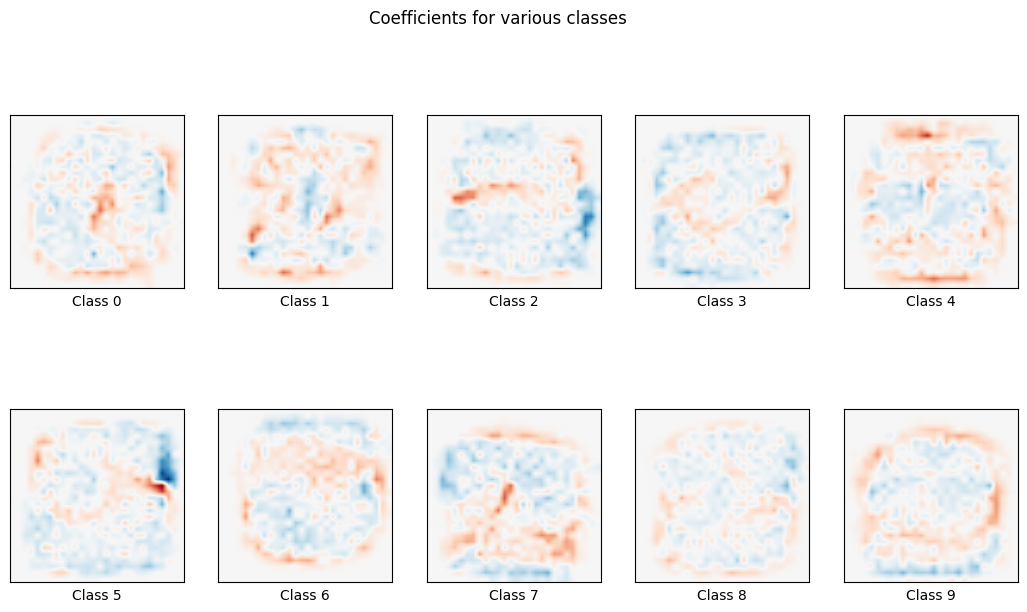

In [ ]:
coef = clf2.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(13,7))

for i in range(10): # 0-9
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(28,28),
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')

    coef_plot.set_xticks(()); coef_plot.set_yticks(())
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes');

In [ ]:
print(clf2.predict(x_test[0:9]))
print(y_test[0:9])

[0 4 1 2 4 4 7 1 1]
10840    0
56267    4
14849    1
62726    2
47180    7
61640    9
52730    7
21847    1
20394    1
Name: class, dtype: int64


In [ ]:
# Make predictions on the test set
predictions = clf2.predict(x_test)

# Visualize the first 10 predictions with rispect to the real values
for i in range(50):
    print(f"Predicted: {predictions[i]}, Actual: {y_test.iloc[i]}")

Predicted: 0, Actual: 0
Predicted: 4, Actual: 4
Predicted: 1, Actual: 1
Predicted: 2, Actual: 2
Predicted: 4, Actual: 7
Predicted: 4, Actual: 9
Predicted: 7, Actual: 7
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 7, Actual: 7
Predicted: 1, Actual: 1
Predicted: 3, Actual: 3
Predicted: 4, Actual: 4
Predicted: 2, Actual: 2
Predicted: 6, Actual: 6
Predicted: 4, Actual: 4
Predicted: 6, Actual: 6
Predicted: 7, Actual: 7
Predicted: 9, Actual: 3
Predicted: 3, Actual: 3
Predicted: 7, Actual: 7
Predicted: 0, Actual: 0
Predicted: 5, Actual: 5
Predicted: 7, Actual: 7
Predicted: 6, Actual: 6
Predicted: 5, Actual: 5
Predicted: 6, Actual: 6
Predicted: 4, Actual: 4
Predicted: 7, Actual: 7
Predicted: 4, Actual: 4
Predicted: 3, Actual: 3
Predicted: 5, Actual: 5
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 4, Actual: 4
Predicted: 6, Actual: 6
Predicted: 3, Actual: 3
Predicted: 9, Actual: 9
Predicted: 4, Actual: 4
Predicted: 5, Actual: 5
Predicted: 8, Actual: 8
Predicted: 0, Ac

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

# Make predictions on training set
predictions = clf2.predict(x_train)

# Accuracy calculation
accuracy = accuracy_score(y_train, predictions)
print(f"Accuracy: {accuracy}")

# Precision calculation
precision = precision_score(y_train, predictions, average='weighted')
print(f"Precision: {precision}")

Accuracy: 0.9372222222222222
Precision: 0.9371331803396804


In [ ]:
from sklearn.metrics import accuracy_score, precision_score

# Make predictions on the test set
predictions = clf2.predict(x_test)

# Accuracy calculation
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Precision calculation
precision = precision_score(y_test, predictions, average='weighted')
print(f"Precision: {precision}")

Accuracy: 0.9218571428571428
Precision: 0.9217672097568258


In [ ]:
from sklearn.metrics import classification_report

# Compute the classification report
class_report = classification_report(y_test, predictions.round(), target_names=[str(i) for i in range(10)])

#Print the classification report
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       705
           1       0.95      0.98      0.97       815
           2       0.92      0.90      0.91       707
           3       0.91      0.88      0.89       684
           4       0.92      0.92      0.92       661
           5       0.90      0.87      0.89       605
           6       0.93      0.95      0.94       674
           7       0.94      0.93      0.93       760
           8       0.88      0.90      0.89       693
           9       0.89      0.91      0.90       696

    accuracy                           0.92      7000
   macro avg       0.92      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000



The logistic regression model results better than the RidgeClassifier. Actually, both the total precision and the accuracy increase. In particular, the accuracy per class is higher than the RidgeClassifier one. Moreover, in this case, the classes that have the lowest precision are the 8 and 9


 Evaluation metrics: confusion matrix

In [ ]:
from sklearn import metrics

In [ ]:
predictions2 = clf2.predict(x_test)

cm = metrics.confusion_matrix(y_true=y_test,
                         y_pred = predictions2,
                        labels = clf2.classes_)
cm

array([[684,   0,   2,   1,   1,   5,   6,   0,   6,   0],
       [  0, 798,   3,   3,   0,   3,   0,   3,   4,   1],
       [  5,   8, 635,  13,   7,   1,   7,   6,  21,   4],
       [  0,   3,  23, 601,   0,  17,   3,   8,  19,  10],
       [  1,   2,   3,   1, 609,   0,  11,   7,   5,  22],
       [  6,   2,   6,  17,   6, 527,  10,   2,  23,   6],
       [  5,   3,   4,   0,   5,  12, 643,   0,   2,   0],
       [  2,   4,   9,   4,   5,   1,   1, 705,   3,  26],
       [  2,  13,   6,  15,   3,  15,   7,   3, 621,   8],
       [  1,   3,   1,   8,  25,   4,   0,  20,   4, 630]])

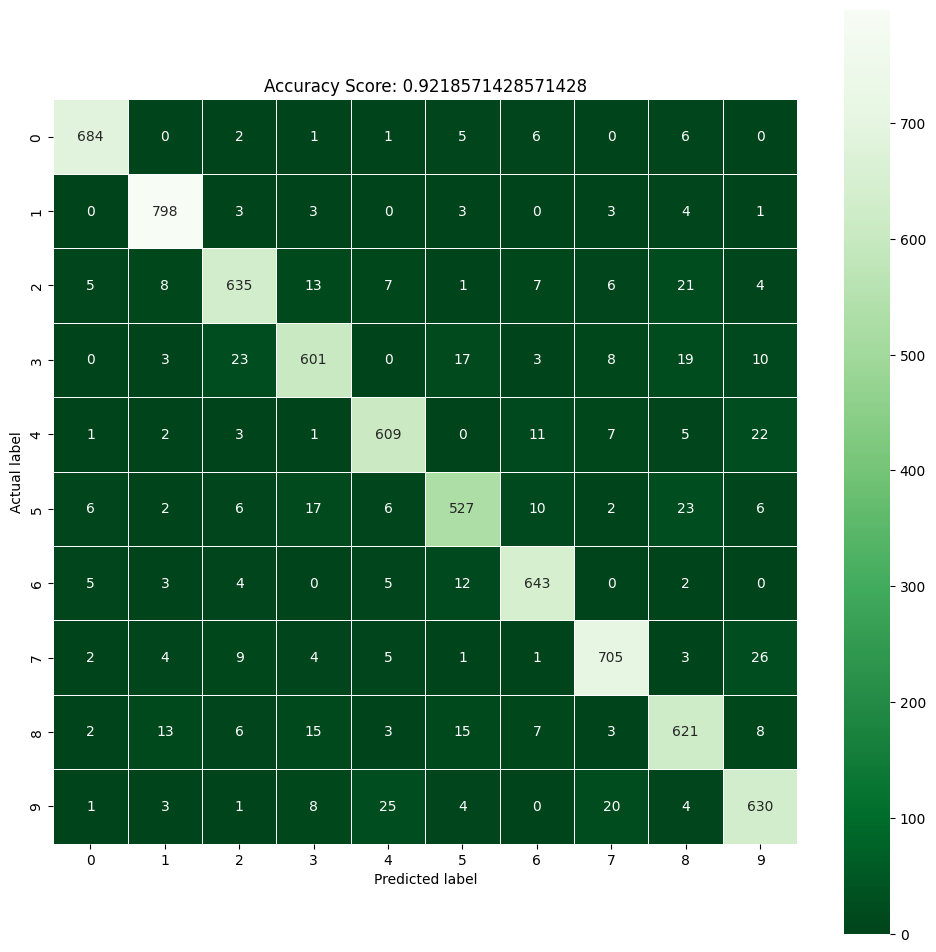

In [ ]:
from sklearn.metrics import accuracy_score
# Assume that 'y_true' is the real label and 'y_pred' is the label predicted by your model
y_true = y_test
y_pred = predictions2

# Calculate accuracy and assign value to 'score2'
score2 = accuracy_score(y_true, y_pred)


plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='Greens_r', fmt='0.4g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score2)
plt.title(all_sample_title)
plt.show()

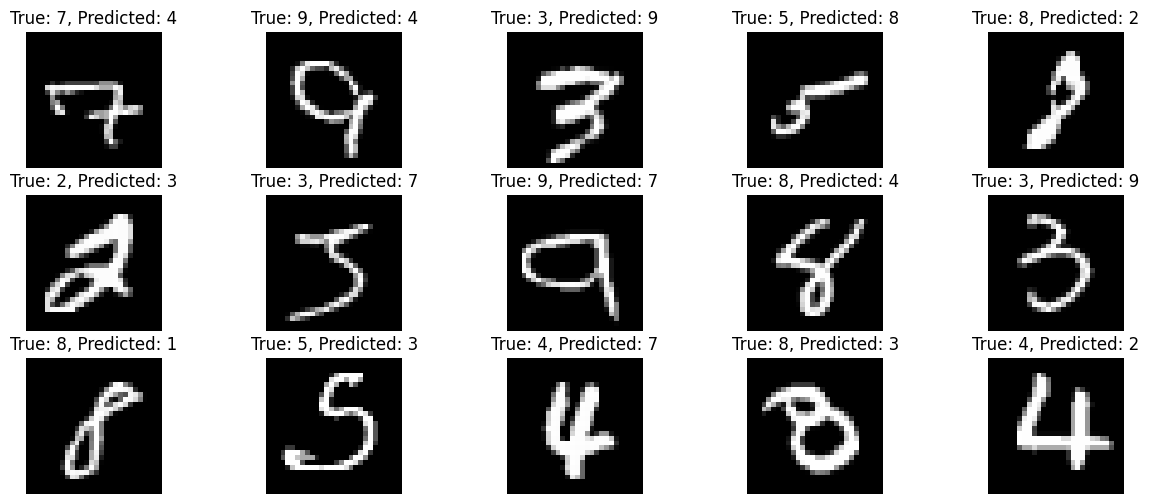

In [ ]:
# Identification of the wrong predictions indexes
misclassified_idx = np.where(y_true != y_pred)[0]

# Visualization of  the first 15 misclassified images
plt.figure(figsize=(15, 6))
for i, idx in enumerate(misclassified_idx[:15]):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test.iloc[idx].values.reshape((28, 28)), cmap='gray')
    plt.title(f'True: {y_true.iloc[idx]}, Predicted: {y_pred[idx]}')
    plt.axis('off')

plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
predictions = clf2.predict(x_test)

# Generate the classification report
report = classification_report(y_test, predictions, output_dict=True)

# Extract precision for each class from the classification report
precisions_per_class = {str(int(cls)): report[str(int(cls))]['precision'] for cls in clf2.classes_}

# Print the precision for each class
print('Precision per class:')
for cls, precision in precisions_per_class.items():
    print(f'Class {cls}: {precision}')

Precision per class:
Class 0: 0.9688385269121813
Class 1: 0.9545454545454546
Class 2: 0.9176300578034682
Class 3: 0.9064856711915535
Class 4: 0.9213313161875946
Class 5: 0.9008547008547009
Class 6: 0.934593023255814
Class 7: 0.9350132625994695
Class 8: 0.8771186440677966
Class 9: 0.8910891089108911


EVALUATION METRICS: ROC curve

Text(0.5, 1.0, 'ROC Curve - Multi-Class')

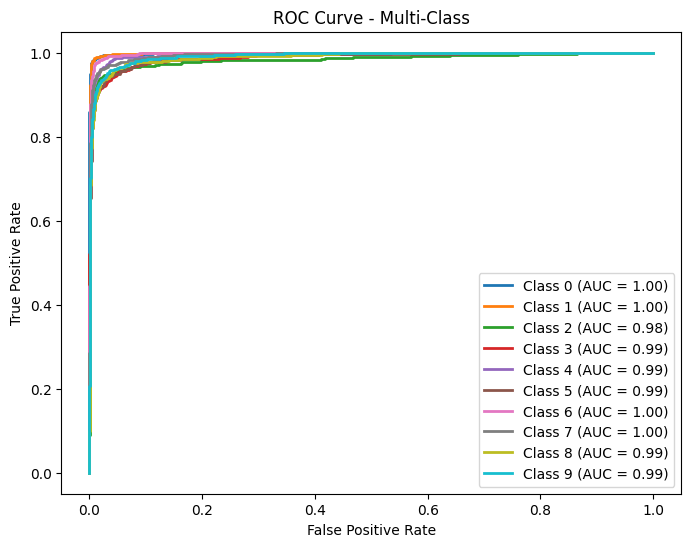

In [ ]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Turn labels into binary shapes
y_test_bin = label_binarize(y_test, classes=clf2.classes_)

# Class probability predictions on the test set
y_probs = clf2.predict_proba(x_test)

# ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(clf2.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Visualization of the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(clf2.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Legend
plt.legend(loc='lower right')

# Axes labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Class')


In [ ]:
y_test_array = y_test.to_numpy()

In [ ]:
print(y_test_array.shape)

(7000,)


In [ ]:
y_test_array = y_test_array.squeeze()

In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming y_probs contains predicted probabilities for the specific class
# y_test_array should contain the actual class labels (0, 1, 2, ..., 9 for each class
auc_scores = []

n_classi = 10  # Number of classes

for i in range(n_classi):
    auc_i = roc_auc_score((y_test_array == i).astype(int), y_probs[:, i])
    auc_scores.append(auc_i)

print(f'AUC per classe: {auc_scores}')

AUC per classe: [0.9990964347478297, 0.9985520083717285, 0.9841695640359251, 0.9895936339159066, 0.9948094057415148, 0.9889185120089946, 0.9982641934609275, 0.9950447031039137, 0.9896326741102387, 0.9923443061147093]


The AUC (Area Under the Curve) is a measure of a model's discriminatory ability. A value of AUC close to 1 indicates a model with excellent discriminatory ability, while a value close to 0.5 suggests that the model struggles to discriminate between classes. Values above 0.5 indicate good discrimination, while values below 0.5 suggest that the model is performing worse than random chance.

In general:

Values close to 1: Good discrimination between the positive and negative class. The model effectively separates the classes.
Values close to 0.5: The model struggles to effectively discriminate between the positive and negative class. It might be equivalent to a random classifier.
Values below 0.5: The model is performing worse than random chance. There may be an issue with how the model is trained or with the dataset.
Furthermore, comparing the AUC values across different classes can provide insights into which classes the model handles better or worse in terms of discrimination.

In this case, the AUC values seem to be very close to 1 for all classes, indicating excellent discriminatory ability for your model across all classes. This is a positive sign, suggesting that the logistic regression model is doing well in classifying the different classes in your problem.

TRAINING AND TEST SET SIZE CHANGE

We can try to increase the dimension of the test test

In [ ]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(mnist.data,
                                                    mnist.target.astype('int'), #targets str to int convert
                                                   test_size=1/7.0,
                                                   random_state=0)

In [ ]:
x1_train.shape, x1_test.shape

((60000, 784), (10000, 784))

In [ ]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression(
    fit_intercept=True,
    multi_class='auto',
    penalty='l1',  # Use of regularization L1 (Lasso)
    solver='saga',
    max_iter=1000,
    C=1,
    verbose=2,  # output progress
    n_jobs=5,  # parallelize over 5 processes
    tol=0.01
)
clf2

LogisticRegression(C=1, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [ ]:
clf2.fit(x1_train, y1_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 47 epochs took 162 seconds


LogisticRegression(C=1, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [ ]:
predictions = clf2.predict(x1_test)

In [ ]:
clf2.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
clf2.coef_[1].round(3) # prints weights for 8x8 image for class 0

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   ,  0.   ,
       -0.   , -0.   ,  0.   ,  0.   , -0.   , -0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   ,
       -0.   , -0.001, -0.001,  0.   ,  0.002,  0.004,  0.001,  0.002,
        0.002,  0.001, -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   , -0.   , -0.   , -0.001, -0.001, -0.002, -0.002, -0.003,
        0.001,  0.002, -0.001,  0.001,  0.002,  0.   , -0.002,  0.   ,
       -0.001, -0.001, -0.001, -0.001, -0.001, -0.   , -0.   ,  0.   ,
      

In [ ]:
print(clf2.predict(x1_test[0:9]))
print(y1_test[0:9])

[0 4 1 2 4 7 7 1 1]
10840    0
56267    4
14849    1
62726    2
47180    7
61640    9
52730    7
21847    1
20394    1
Name: class, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, precision_score

# Make predictions on the train set
predictions = clf2.predict(x1_train)

# Accuracy calculation
accuracy = accuracy_score(y1_train, predictions)
print(f"Accuracy: {accuracy}")

# Precision calculation
precision = precision_score(y1_train, predictions, average='weighted')
print(f"Precision: {precision}")

Accuracy: 0.9374833333333333
Precision: 0.9373929913919201


In [ ]:
from sklearn.metrics import accuracy_score, precision_score

#Make predictions on the test set
predictions = clf2.predict(x1_test)

# Accuracy calculation
accuracy = accuracy_score(y1_test, predictions)
print(f"Accuracy: {accuracy}")

# Precision calculation
precision = precision_score(y1_test, predictions, average='weighted')
print(f"Precision: {precision}")

Accuracy: 0.9191
Precision: 0.9190167413177355


If we increase the size of the test set we can notice a decrease of the accuracy and the precision on the test set. There are several considerations that might explain this behavior:

*   representativeness of the Test Set: with a larger test set, it's important to ensure that it is representative of the distribution of input data. If the larger test set contains patterns or variations not present in the training set, the model may not generalize well, leading to a decrease in performance.
Variation in test Set characteristics: if there are significant differences in the characteristics of the larger test set compared to the smaller one, the model may struggle to generalize effectively to new data, resulting in decreased performance.

* Initial Overfitting: the model may have experienced overfitting during training on the smaller training set. When exposed to a larger test set, it might become evident that the model had memorized specific details of the training set rather than learning general patterns.

* Model Complexity: a model that is too complex may overfit to the training data, reducing its ability to generalize to new data. Having a larger test set could expose this issue.

We can try to understand the reason why the accuracy and the precion decrease with some tests, like visulize the missclassified examples with a confusion matrix or we can display the missclassified images


Accuracy: 0.9191
Precision: 0.9190167413177355
Consistent Accuracy: 0.9191


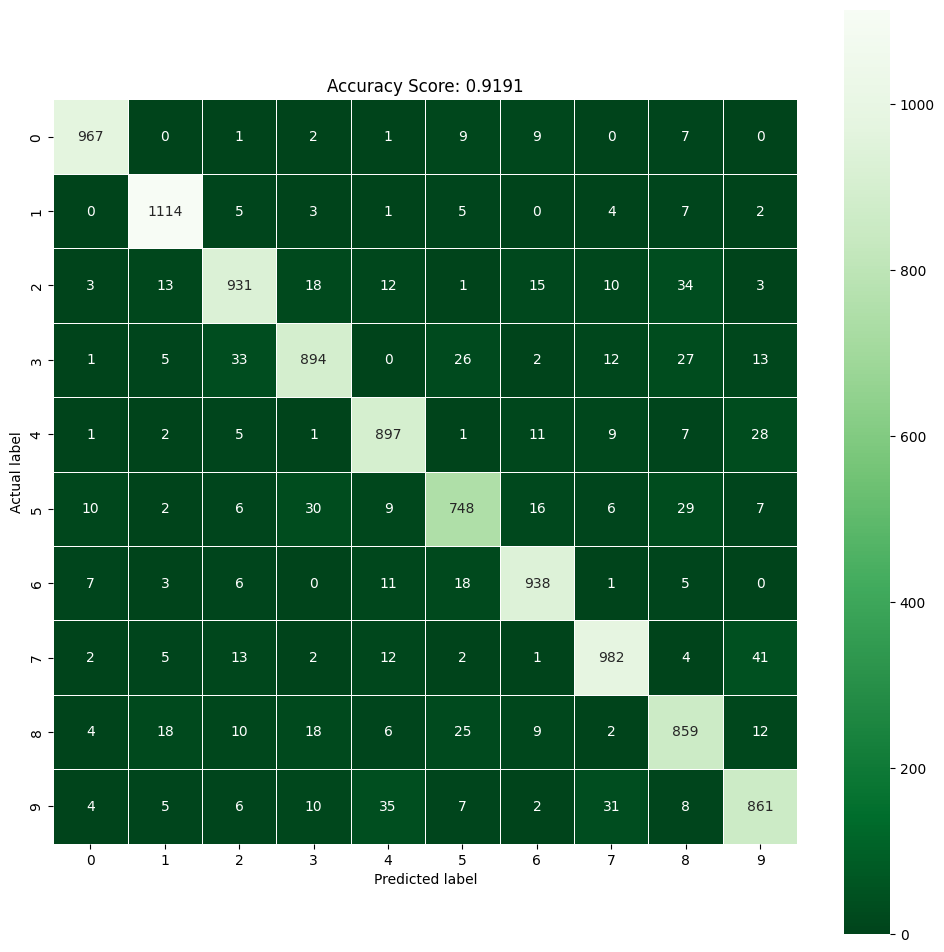

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = clf2.predict(x1_test)

# Accuracy calculation
accuracy = accuracy_score(y1_test, predictions)
print(f"Accuracy: {accuracy}")

# Precision calculation
precision = precision_score(y1_test, predictions, average='weighted')
print(f"Precision: {precision}")

# Assuming 'y1_test' is the true labels for the test set
y1_true = y1_test[:len(predictions)]

# Calculate accuracy using the same predictions for consistency
score2 = accuracy_score(y1_true, predictions)
print(f"Consistent Accuracy: {score2}")

# Plot confusion matrix
cm = confusion_matrix(y1_true, predictions)
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='Greens_r', fmt='0.4g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score2)
plt.title(all_sample_title)
plt.show()

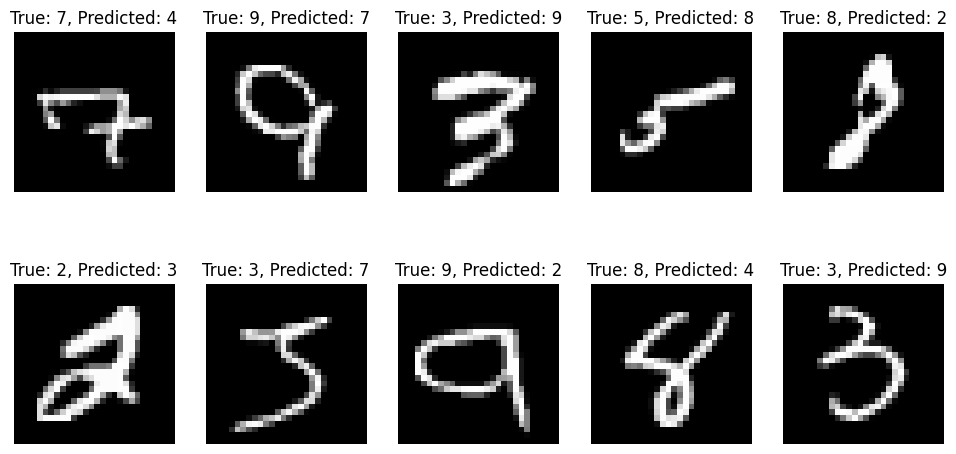

In [ ]:
misclassified_idx = np.where(y1_true != predictions)[0]

plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(2, 5, i + 1)
    # Use iloc to access the DataFrame by numerical index
    plt.imshow(x1_test.iloc[idx].values.reshape((28, 28)), cmap='gray')
    plt.title(f'True: {y1_true.iloc[idx]}, Predicted: {predictions[idx]}')
    plt.axis('off')

plt.show()

# LOGISTIC REGRESSION MODEL IMPLEMENTATION: K-folds procedure

To reduce the probable overfitting a procedure called cross-validation is tested. In the basic approach, called k-fold CV, the training set is split into k smaller sets known as k-folds; the model is trained using k - 1 folds as training data;
the resulting model is validated on the remaining part of the data.


Average Accuracy: 0.9134444444444444
Average Precision: 0.9132053932621541
Consistent Accuracy: 0.9134444444444444


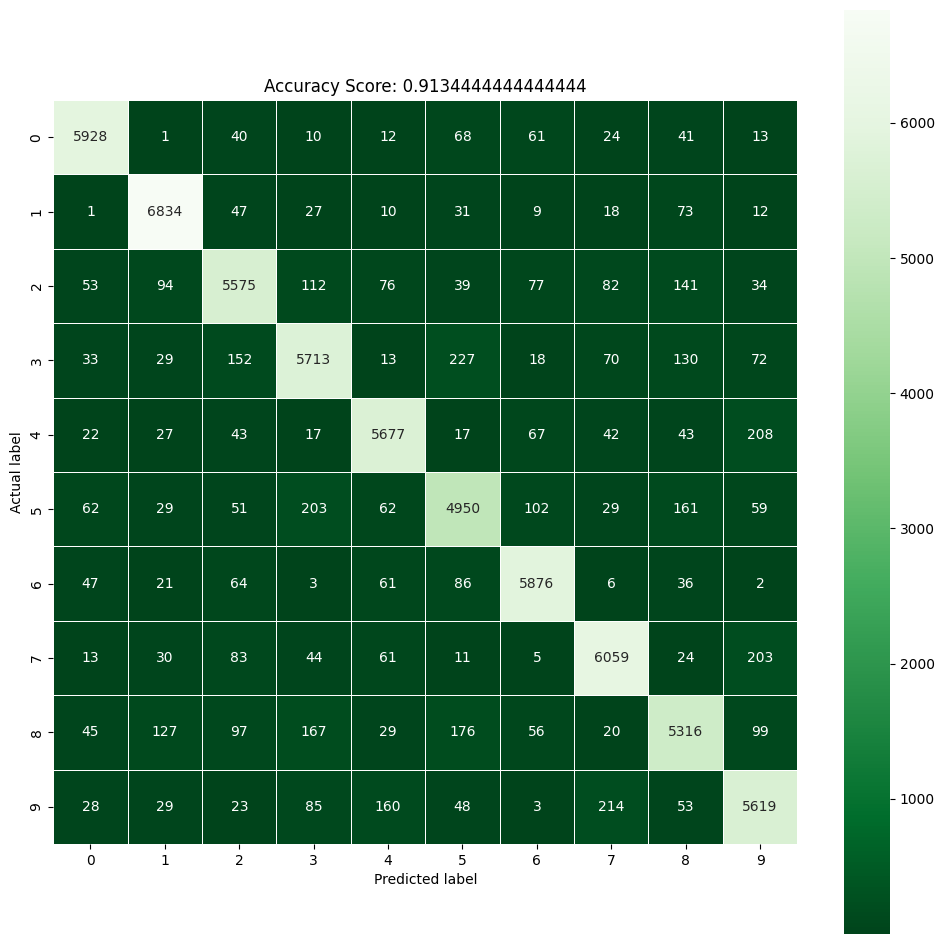

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with data scaling and logistic regression
model = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=5000))

# Set up k-fold cross-validation (5 folds)
num_folds = 5
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# Perform cross-validation and get predictions
y_pred_cv = cross_val_predict(model, x_train, y_train, cv=kfold)

# Calculate accuracy and precision for each fold
accuracy_per_fold = accuracy_score(y_train, y_pred_cv)
precision_per_fold = precision_score(y_train, y_pred_cv, average='weighted')

# Print average accuracy and precision
print(f"Average Accuracy: {accuracy_per_fold.mean()}")
print(f"Average Precision: {precision_per_fold.mean()}")

# Assuming 'y_train' is the true labels for the training set
# Calculate accuracy using the same predictions for consistency
consistent_accuracy = accuracy_score(y_train, y_pred_cv)
print(f"Consistent Accuracy: {consistent_accuracy}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_cv)

# Plot confusion matrix
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, linewidths=.5, square=True, cmap='Greens_r', fmt='0.4g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(consistent_accuracy)
plt.title(all_sample_title)
plt.show()

EVALUATION METRICS: ROC curve

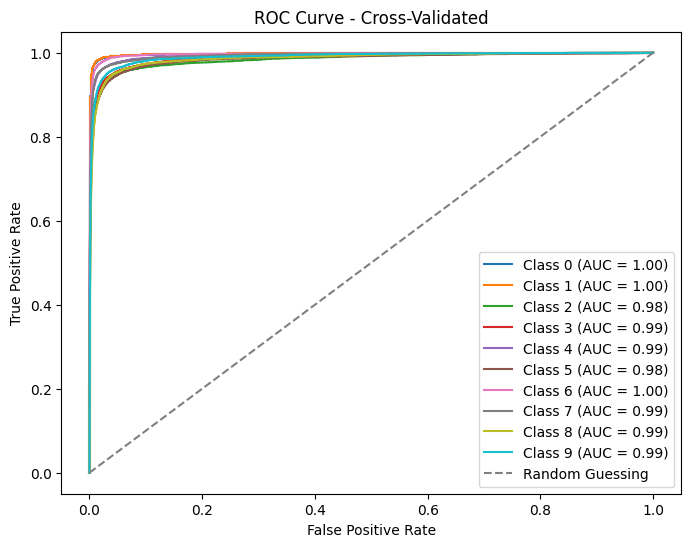

AUC per classe: [0.9971880748010057, 0.9974055990236955, 0.984335494876875, 0.9872887797780165, 0.9929807643619517, 0.9844400176506382, 0.9962235948350099, 0.9931840094263655, 0.9861454228400248, 0.9897847062470821]


In [ ]:


from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create a pipeline with data scaling and logistic regression
model = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=5000))

# Set up k-fold cross-validation (5 folds)
num_folds = 5
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# Get cross-validated predicted probabilities
y_probs_cv = cross_val_predict(model, x_train, y_train, cv=kfold, method='predict_proba')

# Initialize plot
plt.figure(figsize=(8, 6))

# List to store AUC scores for each class
auc_scores = []

# For each class
for i in range(10):
    # Compute ROC curve and AUC for each fold
    fpr, tpr, _ = roc_curve((y_train == i), y_probs_cv[:, i])
    roc_auc = auc(fpr, tpr)

    # Append AUC score to the list
    auc_scores.append(roc_auc)

    # Plot ROC curve for each fold
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot random guessing (no skill)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Set plot labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Cross-Validated')
plt.legend(loc='lower right')
plt.show()

# Print AUC scores for each class
print("AUC per classe:", auc_scores)

We can try to improve the model by increasing the number of folds

Average Accuracy: 0.9153809523809524
Average Precision: 0.9151700793409735
Consistent Accuracy: 0.9153809523809524


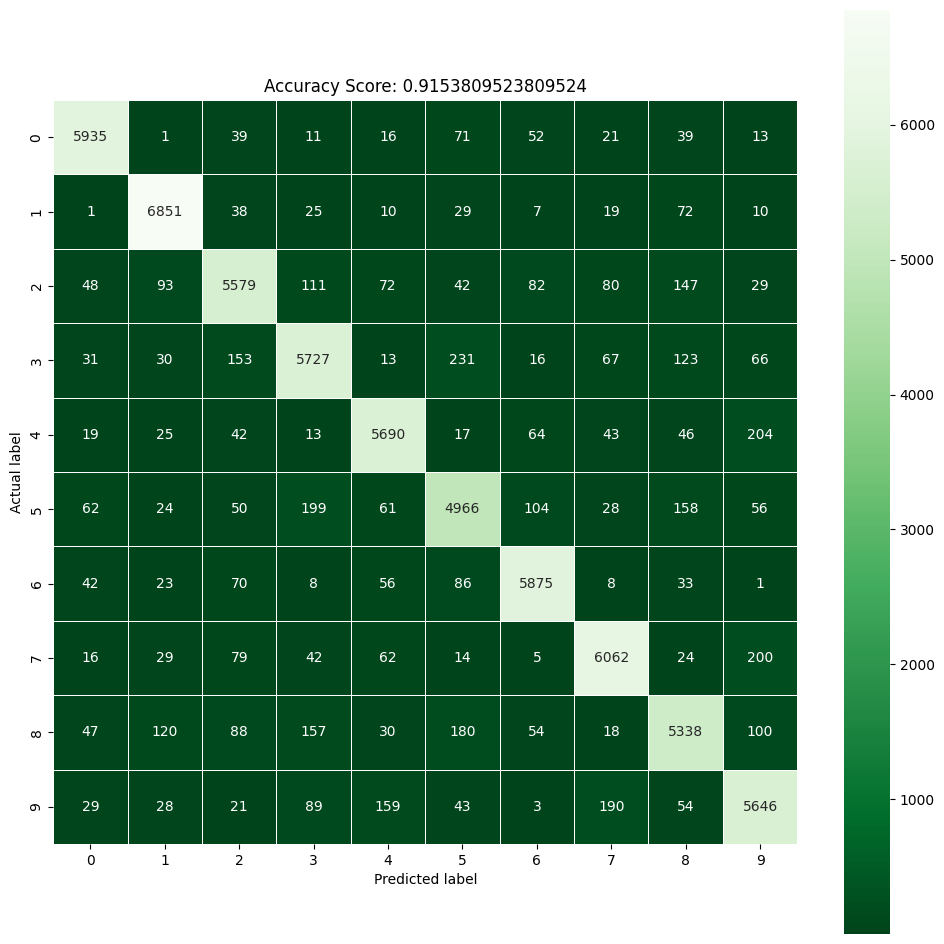

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with data scaling and logistic regression
model = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=5000))

# Set up k-fold cross-validation (10 folds)
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# Perform cross-validation and get predictions
y_pred_cv = cross_val_predict(model, x_train, y_train, cv=kfold)

# Calculate accuracy and precision for each fold
accuracy_per_fold = accuracy_score(y_train, y_pred_cv)
precision_per_fold = precision_score(y_train, y_pred_cv, average='weighted')

# Print average accuracy and precision
print(f"Average Accuracy: {accuracy_per_fold.mean()}")
print(f"Average Precision: {precision_per_fold.mean()}")

# Assuming 'y_train' is the true labels for the training set
# Calculate accuracy using the same predictions for consistency
consistent_accuracy = accuracy_score(y_train, y_pred_cv)
print(f"Consistent Accuracy: {consistent_accuracy}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_cv)

# Plot confusion matrix
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, linewidths=.5, square=True, cmap='Greens_r', fmt='0.4g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(consistent_accuracy)
plt.title(all_sample_title)
plt.show()

In this way we demostrated that if we increase the number of folds, the accuracy increase

# MNIST CLASSIFICATION WITH DECISION TREE MODEL
Decision Trees (DTs) are a non-parametric supervised learning method whose goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree model
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

# Make predictions on the test set
y_pred_test = dtree.predict(x_test)

# Make predictions on the train set (optional)
y_pred_train = dtree.predict(x_train)

# Calculate accuracy on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on test set: {accuracy_test}")

# Calculate accuracy on train set (optional)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on train set: {accuracy_train}")

Accuracy on test set: 0.877
Accuracy on train set: 1.0


In [9]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred_test = dtree.predict(x_test)

# Confusion matrix and classification report for Decision Tree model
cm_dtree = confusion_matrix(y_test, y_pred_test)
classification_report_dtree = classification_report(y_test, y_pred_test)

print("Confusion Matrix:")
print(cm_dtree)

print("\nClassification Report:")
print(classification_report_dtree)

# Accuracy calculation for Decision Tree
accuracy_dtree = accuracy_score(y_test, y_pred_test)
print(f"\nDecision Tree Accuracy: {accuracy_dtree}")

Confusion Matrix:
[[655   1   8   7   3  11   9   1   6   4]
 [  0 780   6   9   2   6   1   2   7   2]
 [  9   6 617  11   9   4  10  12  20   9]
 [  4  10  18 566   4  31   3  12  23  13]
 [  2   1   8   2 587   1  12   6  12  30]
 [  6   4   7  24   5 498  21   6  18  16]
 [  8   2   9   3  10  18 605   1  12   6]
 [  3   5  24  11   7   6   2 678   2  22]
 [  4   7  18  25  13  24  13   7 551  31]
 [  2   2   9  12  24   9   1  19  16 602]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       705
           1       0.95      0.96      0.96       815
           2       0.85      0.87      0.86       707
           3       0.84      0.83      0.84       684
           4       0.88      0.89      0.89       661
           5       0.82      0.82      0.82       605
           6       0.89      0.90      0.90       674
           7       0.91      0.89      0.90       760
           8       0.83      0.80      0

Decision Tree Accuracy: 0.877
Decision Tree Precision: 0.8773066300744394


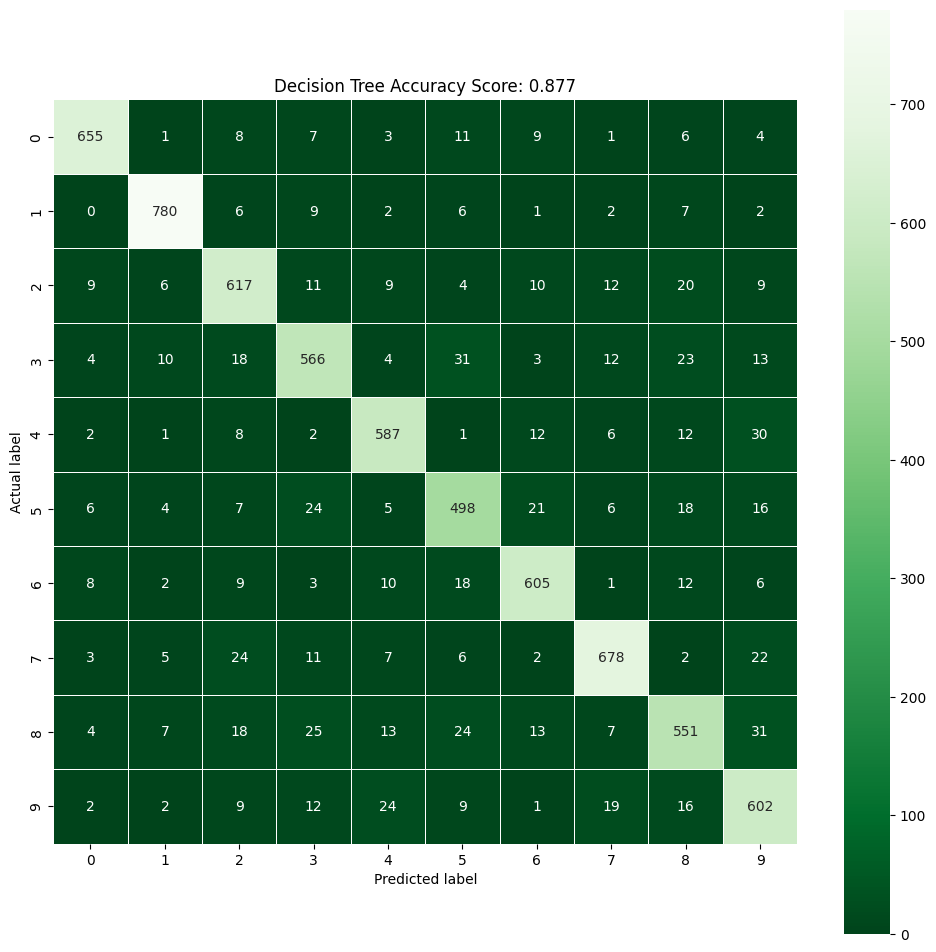

In [10]:
from sklearn.metrics import accuracy_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy calculation for Decision Tree
accuracy_dtree = accuracy_score(y_test, y_pred_test)
print(f"Decision Tree Accuracy: {accuracy_dtree}")

# Precision calculation for Decision Tree
precision_dtree = precision_score(y_test, y_pred_test, average='weighted')
print(f"Decision Tree Precision: {precision_dtree}")

# Plot confusion matrix for Decision Tree
plt.figure(figsize=(12, 12))
sns.heatmap(cm_dtree, annot=True, linewidths=.5, square=True, cmap='Greens_r', fmt='d')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title_dtree = 'Decision Tree Accuracy Score: {0}'.format(accuracy_dtree)
plt.title(all_sample_title_dtree)
plt.show()

(63000, 784) (7000, 784)


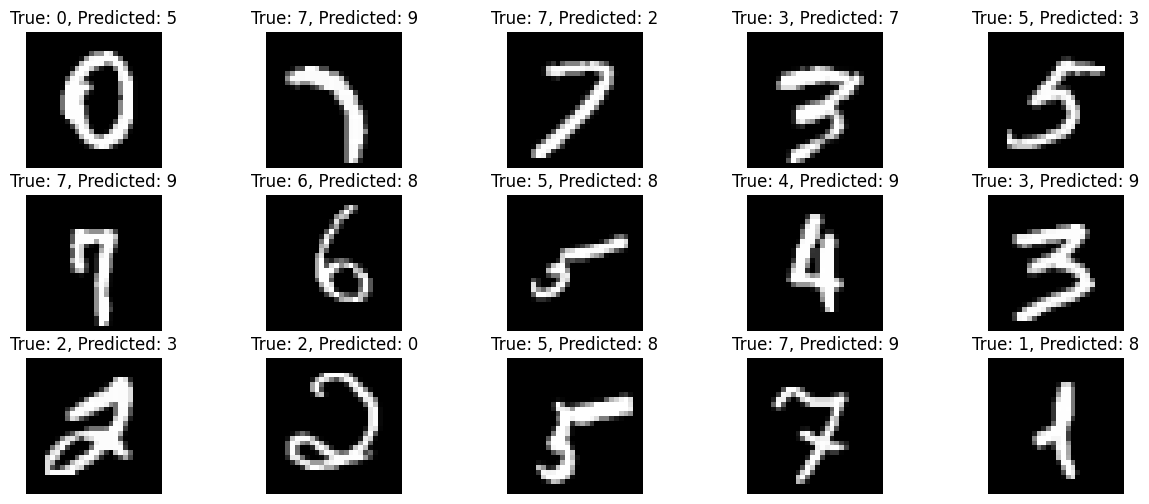

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

mnist_data_array = mnist.data.values
mnist_data_array = mnist_data_array.astype('float32') / 255

x_train, x_test, y_train, y_test = train_test_split(mnist_data_array,
                                                    mnist.target.astype('int'),
                                                    test_size=1/10.0,
                                                    random_state=0)

# Convertion of x_test in a NumPy array
x_test = np.array(x_test)

# Dimension analysis
print(x_train.shape, x_test.shape)

# Create a Decision Tree model
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

# Make predictions on the test set
y_pred_test = dtree.predict(x_test)

# Convertion of the y_test in a  NumPy array
y_test = np.array(y_test)

# Identify missclassified classes indexes
misclassified_idx = np.where(y_test != y_pred_test)[0]

# Visualization of the first 15 misclassified images
plt.figure(figsize=(15, 6))
for i, idx in enumerate(misclassified_idx[:15]):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[idx].reshape((28, 28)), cmap='gray')
    plt.title(f'True: {y_test[idx]}, Predicted: {y_pred_test[idx]}')
    plt.axis('off')

plt.show()




In [12]:
from sklearn.metrics import classification_report

# Make predictions on the test set
predictions_dtree = dtree.predict(x_test)

# Generate the classification report
report_dtree = classification_report(y_test, predictions_dtree, output_dict=True)

# Extract precision for each class from the classification report
precisions_per_class_dtree = {str(int(cls)): report_dtree[str(int(cls))]['precision'] for cls in dtree.classes_}

# Print the precision for each class
print('Precision per class for Decision Tree:')
for cls, precision in precisions_per_class_dtree.items():
    print(f'Class {cls}: {precision}')

Precision per class for Decision Tree:
Class 0: 0.9380403458213257
Class 1: 0.9508599508599509
Class 2: 0.8290366350067843
Class 3: 0.8301610541727672
Class 4: 0.8643815201192251
Class 5: 0.8118811881188119
Class 6: 0.8967065868263473
Class 7: 0.9173441734417345
Class 8: 0.8023426061493412
Class 9: 0.8314447592067988


# MNIST CLASSIFICATION WITH RANDOM FOREST MODEL

Random forest model combines the output of multiple decision trees to reach a single result.

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data,
                                                    mnist.target.astype('int'), #targets str to int convert
                                                   test_size=1/10.0,
                                                   random_state=0)

In [14]:
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm

In [15]:
#training random Forest
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
pred=rf.predict(x_test)
print ("Classification Report")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       705
           1       0.99      0.99      0.99       815
           2       0.96      0.97      0.97       707
           3       0.96      0.96      0.96       684
           4       0.97      0.98      0.97       661
           5       0.97      0.96      0.96       605
           6       0.98      0.99      0.98       674
           7       0.98      0.96      0.97       760
           8       0.97      0.96      0.97       693
           9       0.95      0.95      0.95       696

    accuracy                           0.97      7000
   macro avg       0.97      0.97      0.97      7000
weighted avg       0.97      0.97      0.97      7000

Confusion Report
[[697   0   1   0   0   3   0   0   4   0]
 [  0 805   3   3   1   0   0   1   0   2]
 [  2   1 689   4   2   1   1   3   2   2]
 [  0   1  10 657   0   5   1   4   6   0]
 [  0   0   0   0 645   0   4 

Accuracy: 0.9715714285714285
Precision: 0.9715954242125319
Consistent Accuracy: 0.9715714285714285


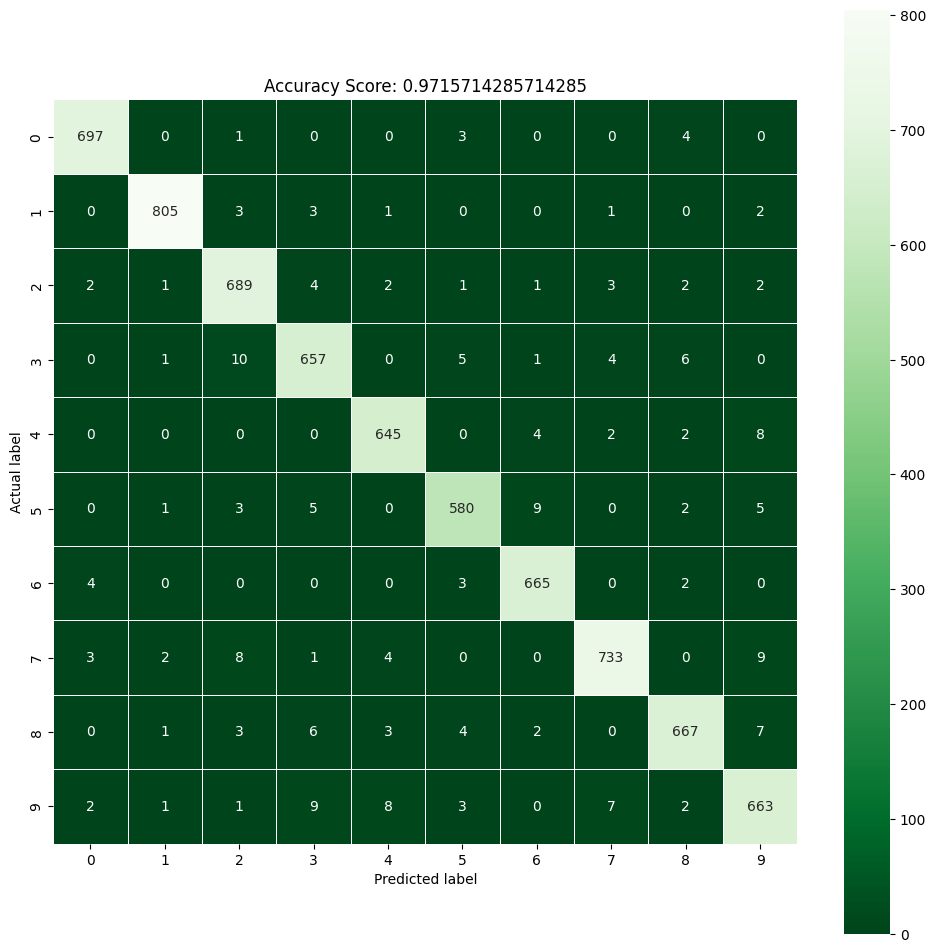

In [17]:
# Make predictions on the test set
predictions = rf.predict(x_test)

# Accuracy calculation
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Precision calculation
precision = precision_score(y_test, predictions, average='weighted')
print(f"Precision: {precision}")

# Assuming 'y_test' is the true labels for the test set
y_true = y_test[:len(predictions)]

# Calculate accuracy using the same predictions for consistency
consistent_accuracy = accuracy_score(y_true, predictions)
print(f"Consistent Accuracy: {consistent_accuracy}")

# Plot confusion matrix
cm = confusion_matrix(y_true, predictions)
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='Greens_r', fmt='0.4g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(consistent_accuracy)
plt.title(all_sample_title)
plt.show()

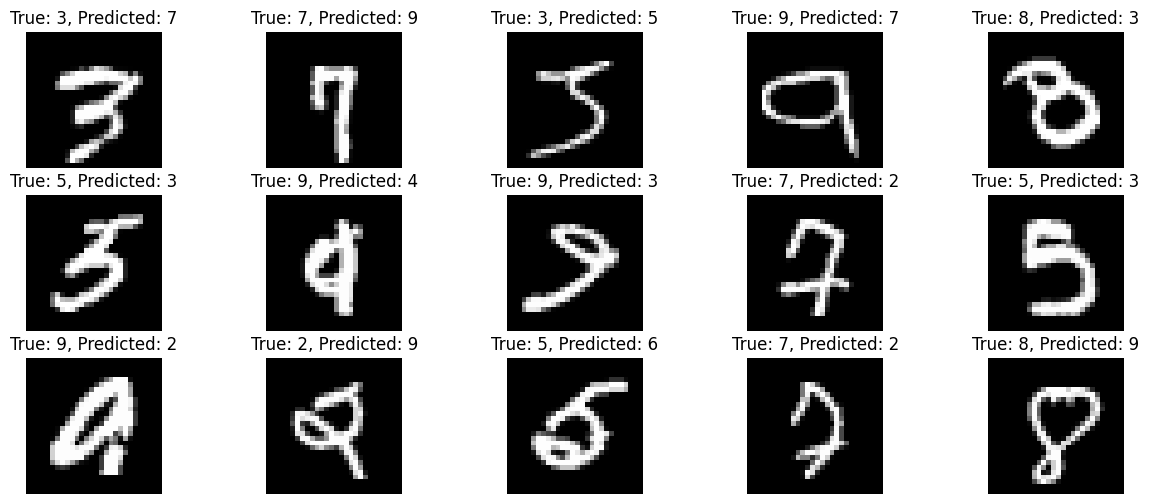

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

mnist_data_array = mnist.data.values
mnist_data_array = mnist_data_array.astype('float32') / 255

x_train, x_test, y_train, y_test = train_test_split(mnist_data_array,
                                                    mnist.target.astype('int'),
                                                    test_size=1/10.0,
                                                    random_state=0)

# Create a Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

# Make predictions on the test set
y_pred_test = rf.predict(x_test)

# Convert y_test to a NumPy array
y_test = np.array(y_test)

# Find misclassified indexes
misclassified_idx = np.where(y_test != y_pred_test)[0]

# Visualization of the first 15 misclassified images
plt.figure(figsize=(15, 6))
for i, idx in enumerate(misclassified_idx[:15]):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[idx].reshape((28, 28)), cmap='gray')
    plt.title(f'True: {y_test[idx]}, Predicted: {y_pred_test[idx]}')
    plt.axis('off')

plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
predictions_rf = rf.predict(x_test)

# Generate the classification report
report_rf = classification_report(y_test, predictions_rf, output_dict=True)

# Extract precision for each class from the classification report
precisions_per_class_rf = {str(int(cls)): report_rf[str(int(cls))]['precision'] for cls in rf.classes_}

# Print the precision for each class
print('Precision per class for Random Forest:')
for cls, precision in precisions_per_class_rf.items():
    print(f'Class {cls}: {precision}')

Precision per class for Random Forest:
Class 0: 0.9858356940509915
Class 1: 0.9914004914004914
Class 2: 0.9529085872576177
Class 3: 0.9588235294117647
Class 4: 0.9756468797564688
Class 5: 0.9732888146911519
Class 6: 0.9793510324483776
Class 7: 0.9722222222222222
Class 8: 0.9709302325581395
Class 9: 0.9442857142857143


# MNIST CLASSIFICATION WITH SVM MODEL

Support Vector Machine (SVM) is a supervised machine learning algorithm used for both classification and regression. In this case it is used for a classification problem. The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space. The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible. The dimension of the hyperplane depends upon the number of features.

In [19]:
from sklearn.svm import SVC, LinearSVC

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data,
                                                    mnist.target.astype('int'), #targets str to int convert
                                                   test_size=1/10.0,
                                                   random_state=0)

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Create an SVM model
svm_model = SVC()

# Train the model on the training set
svm_model.fit(x_train, y_train)

# Make predictions on the test set
predictions = svm_model.predict(x_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9797142857142858


In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
# Make predictions on the test set
predictions_svm = svm_model.predict(x_test)

# Confusion matrix and classification report for SVM model
cm_svm = confusion_matrix(y_test, predictions_svm)
classification_report_svm = classification_report(y_test, predictions_svm)

print("Confusion Matrix:")
print(cm_svm)

print("\nClassification Report:")
print(classification_report_svm)

# Accuracy calculation for SVM
accuracy_svm = accuracy_score(y_test, predictions_svm)
print(f"\nSVM Accuracy: {accuracy_svm}")

Confusion Matrix:
[[701   0   1   0   0   1   1   0   1   0]
 [  0 812   1   0   0   0   0   1   0   1]
 [  2   0 691   1   4   0   1   4   3   1]
 [  0   1   7 662   0   5   0   2   7   0]
 [  0   2   1   0 648   0   1   2   0   7]
 [  0   1   3   4   0 589   5   0   3   0]
 [  3   0   0   0   0   2 667   0   2   0]
 [  2   1   6   0   6   0   0 739   0   6]
 [  0   2   3   4   0   2   3   0 675   4]
 [  1   1   1   2   7   3   0   7   0 674]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       705
           1       0.99      1.00      0.99       815
           2       0.97      0.98      0.97       707
           3       0.98      0.97      0.98       684
           4       0.97      0.98      0.98       661
           5       0.98      0.97      0.98       605
           6       0.98      0.99      0.99       674
           7       0.98      0.97      0.98       760
           8       0.98      0.97      0

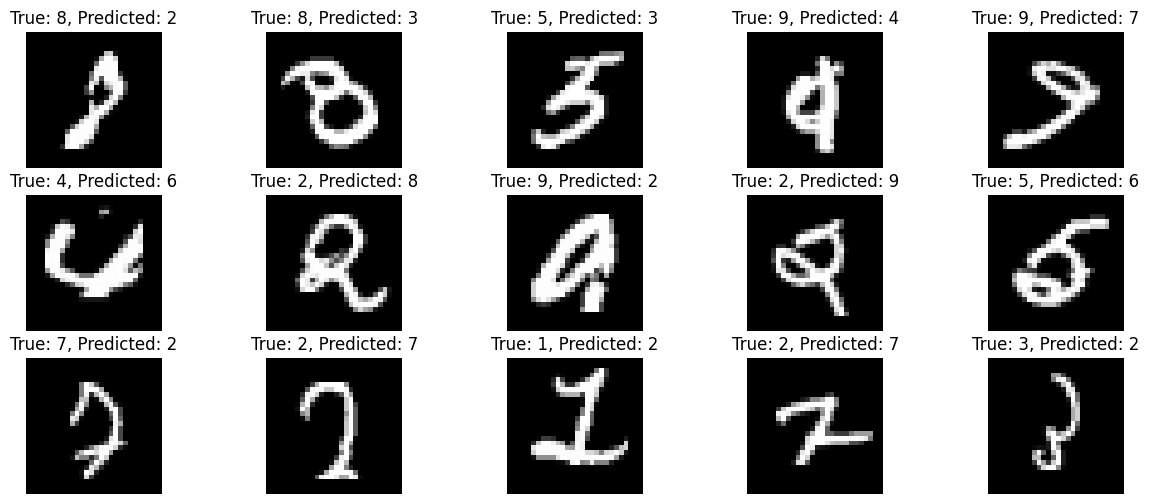

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

mnist_data_array = mnist.data.values
mnist_data_array = mnist_data_array.astype('float32') / 255

x_train, x_test, y_train, y_test = train_test_split(mnist_data_array,
                                                    mnist.target.astype('int'),
                                                    test_size=1/10.0,
                                                    random_state=0)

# Create an SVM model
svm_model = SVC()

# Train the model on the training set
svm_model.fit(x_train, y_train)

# Make predictions on the test set
predictions = svm_model.predict(x_test)

# Convert y_test to a NumPy array
y_test = np.array(y_test)

# Find misclassified indexes
misclassified_idx = np.where(y_test != predictions)[0]

# Visualization of the first 15 misclassified images
plt.figure(figsize=(15, 6))
for i, idx in enumerate(misclassified_idx[:15]):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[idx].reshape((28, 28)), cmap='gray')
    plt.title(f'True: {y_test[idx]}, Predicted: {predictions[idx]}')
    plt.axis('off')

plt.show()

In [26]:
from sklearn.metrics import classification_report

# Make predictions on the test set using the SVM model
predictions_svm = svm_model.predict(x_test)

# Generate the classification report
report_svm = classification_report(y_test, predictions_svm, output_dict=True)

# Extract precision for each class from the classification report
precisions_per_class_svm = {str(int(cls)): report_svm[str(int(cls))]['precision'] for cls in svm_model.classes_}

# Print the precision for each class
print('Precision per class for SVM:')
for cls, precision in precisions_per_class_svm.items():
    print(f'Class {cls}: {precision}')


Precision per class for SVM:
Class 0: 0.9887165021156559
Class 1: 0.9902439024390244
Class 2: 0.9677871148459384
Class 3: 0.9836552748885586
Class 4: 0.9744360902255639
Class 5: 0.978405315614618
Class 6: 0.9837758112094396
Class 7: 0.9788079470198675
Class 8: 0.9768451519536903
Class 9: 0.9725829725829725


EVALUATION METRICS: confusion matrix

SVM Accuracy: 0.9797142857142858
SVM Precision: 0.9797153514281507
SVM Consistent Accuracy: 0.9797142857142858


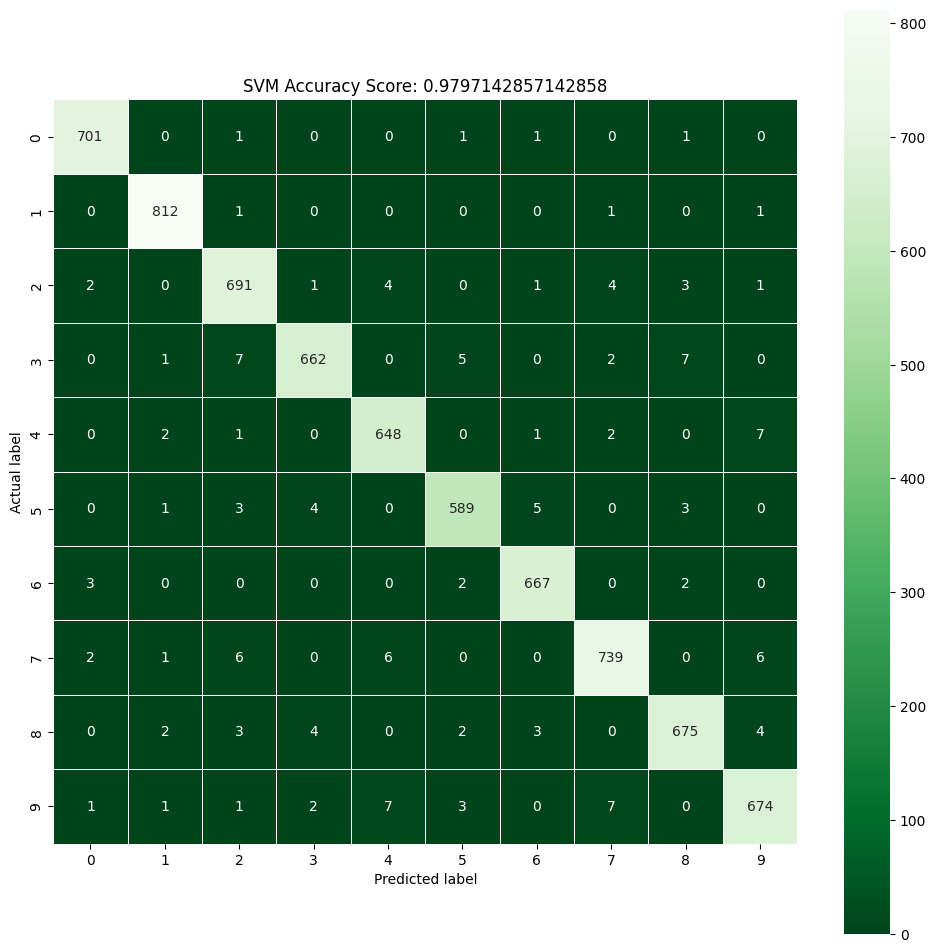

In [ ]:
# Accuracy calculation for SVM
accuracy_svm = accuracy_score(y_test, predictions_svm)
print(f"SVM Accuracy: {accuracy_svm}")

# Precision calculation for SVM
precision_svm = precision_score(y_test, predictions_svm, average='weighted')
print(f"SVM Precision: {precision_svm}")

# Assuming 'y_test' is the true labels for the test set for SVM
y_true_svm = y_test[:len(predictions_svm)]

# Calculate accuracy using the same predictions for consistency for SVM
consistent_accuracy_svm = accuracy_score(y_true_svm, predictions_svm)
print(f"SVM Consistent Accuracy: {consistent_accuracy_svm}")

# Plot confusion matrix for SVM
cm_svm = confusion_matrix(y_true_svm, predictions_svm)
plt.figure(figsize=(12, 12))
sns.heatmap(cm_svm, annot=True, linewidths=.5, square=True, cmap='Greens_r', fmt='0.4g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title_svm = 'SVM Accuracy Score: {0}'.format(consistent_accuracy_svm)
plt.title(all_sample_title_svm)
plt.show()

# MNIST CLASSIFICATION WITH A CNN


A convolutional neural network is  used to analyze visual images by processing data with grid-like topology.  A convolutional neural network is used to detect and classify objects in an image.
A convolution neural network has multiple hidden layers that help in extracting information from an image. The four important layers in CNN are:

*   Convolution layer

*   ReLU layer

*   Pooling layer

*   Fully connected layer

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [4]:
#OLD from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
#one-hot encode target column
y_train_OHE = to_categorical(y_train)
y_test_OHE = to_categorical(y_test)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [6]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 10)                184330    
                                                                 
Total params: 203434 (794.66 KB)
Trainable params: 203434 (794.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
%%time
#train the model
model.fit(X_train, y_train_OHE, validation_data=(X_test, y_test_OHE), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 168s 89ms/step - loss: 0.2633 - accuracy: 0.9499 - val_loss: 0.0846 - val_accuracy: 0.9730
Epoch 2/3
1875/1875 [==============================] - 164s 88ms/step - loss: 0.0697 - accuracy: 0.9787 - val_loss: 0.0811 - val_accuracy: 0.9758
Epoch 3/3
1875/1875 [==============================] - 162s 86ms/step - loss: 0.0502 - accuracy: 0.9839 - val_loss: 0.0874 - val_accuracy: 0.9771
CPU times: user 12min 5s, sys: 12.9 s, total: 12min 18s
Wall time: 8min 22s


In [9]:
model.predict(X_test[:10])

1/1 [==============================] - 0s 101ms/step


array([[2.3904302e-11, 1.0045267e-15, 4.3477416e-10, 4.9219055e-09,
        3.0037715e-15, 2.0031775e-11, 1.5882466e-16, 9.9999994e-01,
        4.5795550e-09, 2.4119479e-10],
       [8.7338498e-07, 1.1445168e-09, 9.9506092e-01, 1.6753461e-06,
        2.2342888e-11, 3.0257148e-15, 4.9365889e-03, 6.4359040e-16,
        5.1109616e-08, 4.7272401e-14],
       [5.4788654e-07, 9.9798840e-01, 1.0827271e-05, 4.9282143e-08,
        8.6660384e-06, 1.4762031e-06, 4.2675083e-06, 3.8772228e-06,
        1.9818780e-03, 9.3281642e-08],
       [9.9998528e-01, 4.5703930e-10, 2.8158745e-08, 9.0866816e-09,
        2.3127490e-11, 6.3033871e-09, 1.0908184e-05, 2.8703010e-08,
        3.7291846e-07, 3.3689910e-06],
       [1.0906722e-11, 3.9537849e-09, 1.6494290e-08, 1.1376740e-07,
        9.9999255e-01, 6.1103580e-13, 7.0607957e-11, 1.2412312e-13,
        9.8014210e-09, 7.2870948e-06],
       [1.9147519e-09, 9.9999553e-01, 6.1981313e-09, 7.1788547e-10,
        9.6314545e-07, 1.6565355e-10, 4.3239465e-10, 7.44

In [10]:
y_test_OHE[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [11]:
y_test[0]

7

In [12]:
y_test[1]

2

In [13]:
y_test[10]

0

In [14]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from sklearn.metrics import classification_report, confusion_matrix

# predict on the test set
y_pred = model.predict(X_test)

# convert predictions to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# convert one-hot encoded labels back to categorical labels
y_test_labels = np.argmax(y_test_OHE, axis=1)

# print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))

# print classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))



313/313 [==============================] - 8s 27ms/step
Confusion Matrix:
[[ 964    1    2    1    0    0    1    2    4    5]
 [   2 1113    3    5    1    1    2    2    6    0]
 [   0    3 1011    3    3    0    1    9    2    0]
 [   0    0    0 1003    0    3    0    1    1    2]
 [   0    0    0    0  972    0    3    1    0    6]
 [   1    0    0   15    0  862    7    1    2    4]
 [   5    2    0    1    3    3  942    0    2    0]
 [   0    4   10   14    4    2    0  993    0    1]
 [   4    0    9    8    4    3    3    3  930   10]
 [   1    6    0    9    4    3    0    4    1  981]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.98      0.98      1135
           2       0.98      0.98      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.97      0.97    

EVALUATION METRICS: confusion matrix

313/313 [==============================] - 7s 22ms/step
CNN Accuracy: 0.9771
CNN Precision: 0.9772704138705167


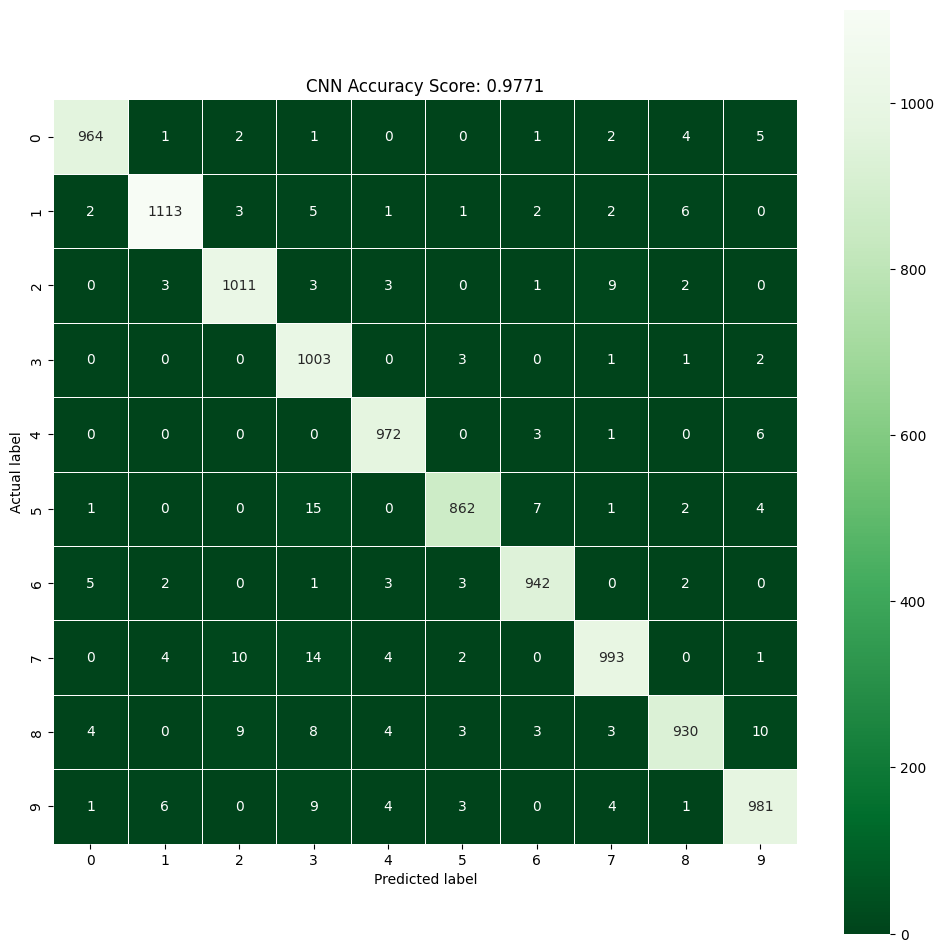

In [15]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set using the CNN model
predictions_cnn_prob = model.predict(X_test)
predictions_cnn = np.argmax(predictions_cnn_prob, axis=1)

# Convert one-hot encoded labels back to categorical labels
y_test_labels = np.argmax(y_test_OHE, axis=1)

# Calculate accuracy
accuracy_cnn = accuracy_score(y_test_labels, predictions_cnn)
print(f"CNN Accuracy: {accuracy_cnn}")

# Calculate precision
precision_cnn = precision_score(y_test_labels, predictions_cnn, average='weighted')
print(f"CNN Precision: {precision_cnn}")

# Plot confusion matrix
cm_cnn = confusion_matrix(y_test_labels, predictions_cnn)
plt.figure(figsize=(12, 12))
sns.heatmap(cm_cnn, annot=True, linewidths=.5, square=True, cmap='Greens_r', fmt='0.4g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title_cnn = 'CNN Accuracy Score: {0}'.format(accuracy_cnn)
plt.title(all_sample_title_cnn)
plt.show()


313/313 [==============================] - 6s 18ms/step


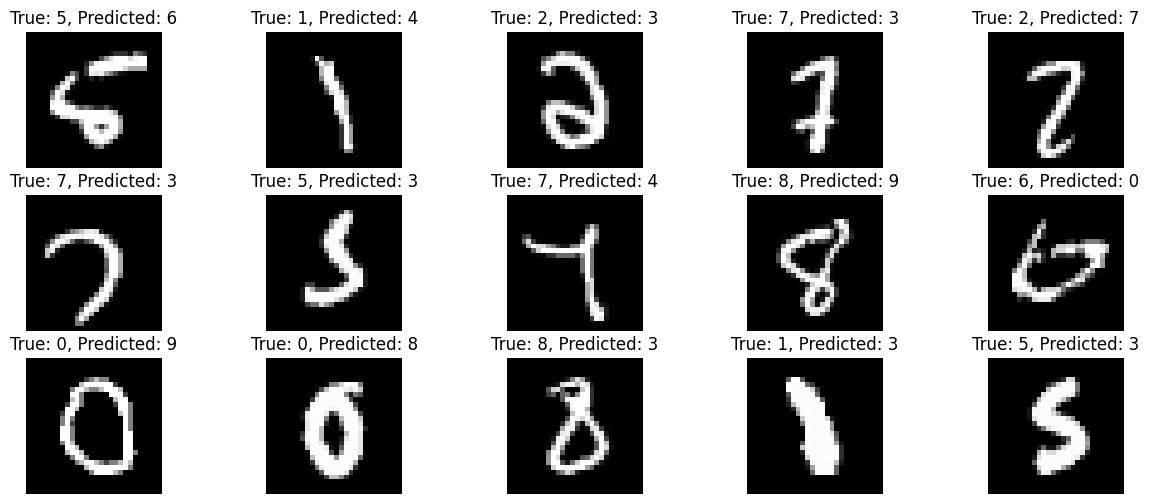

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions_cnn_prob = model.predict(X_test)
predictions_cnn = np.argmax(predictions_cnn_prob, axis=1)  # Ottieni le etichette di classe predette

# Find misclassified indexes
misclassified_idx = np.where(y_test != predictions_cnn)[0]

# Visualization of the first 15 misclassified images
plt.figure(figsize=(15, 6))
for i, idx in enumerate(misclassified_idx[:15]):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[idx].reshape((28, 28)), cmap='gray')
    plt.title(f'True: {y_test[idx]}, Predicted: {predictions_cnn[idx]}')
    plt.axis('off')

plt.show()

In [17]:
from sklearn.metrics import classification_report

# Make predictions on the test set using the CNN model
predictions_cnn_prob = model.predict(X_test)
predictions_cnn = np.argmax(predictions_cnn_prob, axis=1)

# Convert one-hot encoded labels back to categorical labels
y_test_labels = np.argmax(y_test_OHE, axis=1)

# Generate the classification report
report_cnn = classification_report(y_test_labels, predictions_cnn, output_dict=True)

# Extract precision for each class from the classification report
precisions_per_class_cnn = {str(int(cls)): report_cnn[str(int(cls))]['precision'] for cls in range(10)}

# Print the precision for each class
print('Precision per class for CNN:')
for cls, precision in precisions_per_class_cnn.items():
    print(f'Class {cls}: {precision}')




313/313 [==============================] - 6s 18ms/step
Precision per class for CNN:
Class 0: 0.9866939611054247
Class 1: 0.9858281665190434
Class 2: 0.9768115942028985
Class 3: 0.947119924457035
Class 4: 0.9808274470232089
Class 5: 0.9828962371721779
Class 6: 0.9822732012513035
Class 7: 0.9773622047244095
Class 8: 0.9810126582278481
Class 9: 0.9722497522299306


The same model can be tested increasing the number of epochs

In [18]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data to fit the model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# One-hot encode target column
y_train_OHE = to_categorical(y_train)
y_test_OHE = to_categorical(y_test)

# Create the CNN model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile the model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with 10 epochs
history = model.fit(X_train, y_train_OHE, validation_data=(X_test, y_test_OHE), epochs=10)


Epoch 1/10
1875/1875 [==============================] - 159s 84ms/step - loss: 0.2613 - accuracy: 0.9506 - val_loss: 0.0894 - val_accuracy: 0.9716
Epoch 2/10
1875/1875 [==============================] - 153s 82ms/step - loss: 0.0652 - accuracy: 0.9799 - val_loss: 0.0972 - val_accuracy: 0.9737
Epoch 3/10
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0469 - accuracy: 0.9857 - val_loss: 0.0989 - val_accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 153s 82ms/step - loss: 0.0346 - accuracy: 0.9894 - val_loss: 0.0956 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.1269 - val_accuracy: 0.9739
Epoch 6/10
1875/1875 [==============================] - 153s 82ms/step - loss: 0.0263 - accuracy: 0.9925 - val_loss: 0.1161 - val_accuracy: 0.9791
Epoch 7/10
1875/1875 [==============================] - 152s 81ms/step - loss: 0.0188 - accuracy: 0.9944 - val_loss: 0

In [19]:
model.predict(X_test[:10])

1/1 [==============================] - 0s 79ms/step


array([[4.1853905e-27, 2.7321705e-30, 2.5196934e-22, 2.4923638e-21,
        9.5270614e-35, 5.5655771e-33, 0.0000000e+00, 9.9999994e-01,
        6.4358062e-23, 1.0460211e-24],
       [1.0330246e-20, 3.2036679e-20, 9.9999994e-01, 6.0771792e-26,
        8.2140934e-35, 2.2983924e-31, 3.4866574e-22, 5.9163386e-37,
        2.7934547e-22, 1.5097084e-34],
       [6.2059048e-21, 9.9999994e-01, 2.4985464e-10, 1.8144726e-22,
        4.9952247e-11, 2.8830623e-15, 8.4715248e-16, 1.0730075e-14,
        2.9159056e-12, 5.2836726e-26],
       [9.9999994e-01, 8.7529452e-25, 7.8333435e-19, 3.7621890e-22,
        6.7971290e-22, 2.1370591e-21, 1.1240974e-17, 8.7839788e-19,
        2.5948983e-17, 3.6111927e-12],
       [9.7457493e-25, 3.5439086e-26, 9.9932416e-25, 1.5126219e-31,
        9.9999994e-01, 1.1017873e-33, 4.4976599e-26, 8.2788207e-23,
        1.4088999e-27, 2.2813630e-20],
       [4.8819873e-22, 9.9999994e-01, 4.1901248e-17, 7.7813532e-24,
        1.0200071e-15, 2.3918296e-23, 6.0481871e-23, 1.46

In [20]:
y_test_OHE[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [21]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from sklearn.metrics import classification_report, confusion_matrix

# predict on the test set
y_pred = model.predict(X_test)

# convert predictions to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# convert one-hot encoded labels back to categorical labels
y_test_labels = np.argmax(y_test_OHE, axis=1)

# print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))

# print classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))



313/313 [==============================] - 7s 22ms/step
Confusion Matrix:
[[ 968    1    2    0    0    0    1    1    6    1]
 [   1 1127    3    0    1    1    0    2    0    0]
 [   2    2 1017    2    1    0    0    6    1    1]
 [   1    0   11  982    0   10    0    2    4    0]
 [   0    1    3    0  959    0    2    1    3   13]
 [   2    0    1    7    0  871    7    0    1    3]
 [   7    4    1    0    1    7  935    0    2    1]
 [   0    1   16    3    3    0    0 1000    2    3]
 [   7    0    6    5    2    1    3    5  941    4]
 [   4    4    2    3    7    4    0    7    4  974]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.98    

313/313 [==============================] - 7s 22ms/step
CNN Accuracy: 0.9774
CNN Precision: 0.9774683626766435
CNN Consistent Accuracy: 0.9774


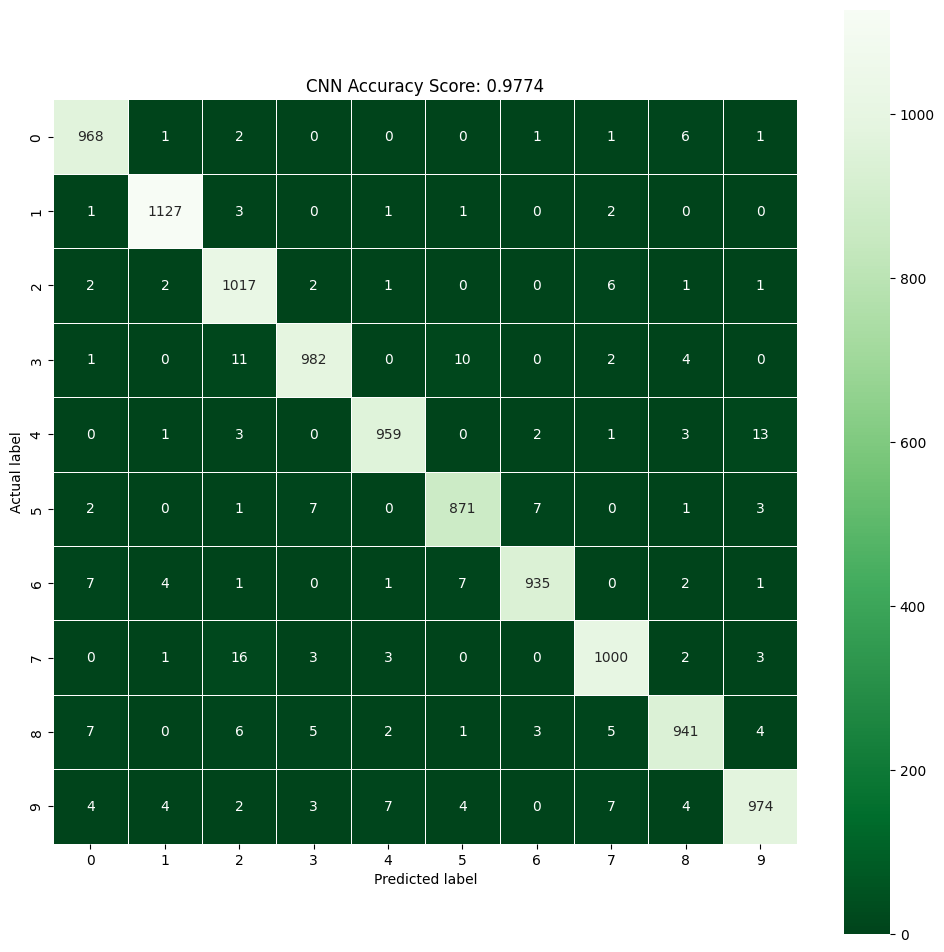

In [22]:

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# predict on the test set
y_pred = model.predict(X_test)

# convert predictions to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# convert one-hot encoded labels back to categorical labels
y_test_labels = np.argmax(y_test_OHE, axis=1)

# Accuracy calculation
accuracy_cnn = accuracy_score(y_test_labels, y_pred_labels)
print(f"CNN Accuracy: {accuracy_cnn}")

# Precision calculation
precision_cnn = precision_score(y_test_labels, y_pred_labels, average='weighted')
print(f"CNN Precision: {precision_cnn}")

# Assuming 'y_test_labels' is the true labels for the test set for CNN
y_true_cnn = y_test_labels[:len(y_pred_labels)]

# Calculate accuracy using the same predictions for consistency
consistent_accuracy_cnn = accuracy_score(y_true_cnn, y_pred_labels)
print(f"CNN Consistent Accuracy: {consistent_accuracy_cnn}")

# Plot confusion matrix
cm_cnn = confusion_matrix(y_true_cnn, y_pred_labels)
plt.figure(figsize=(12, 12))
sns.heatmap(cm_cnn, annot=True, linewidths=.5, square=True, cmap='Greens_r', fmt='0.4g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title_cnn = 'CNN Accuracy Score: {0}'.format(consistent_accuracy_cnn)
plt.title(all_sample_title_cnn)
plt.show()

313/313 [==============================] - 7s 21ms/step


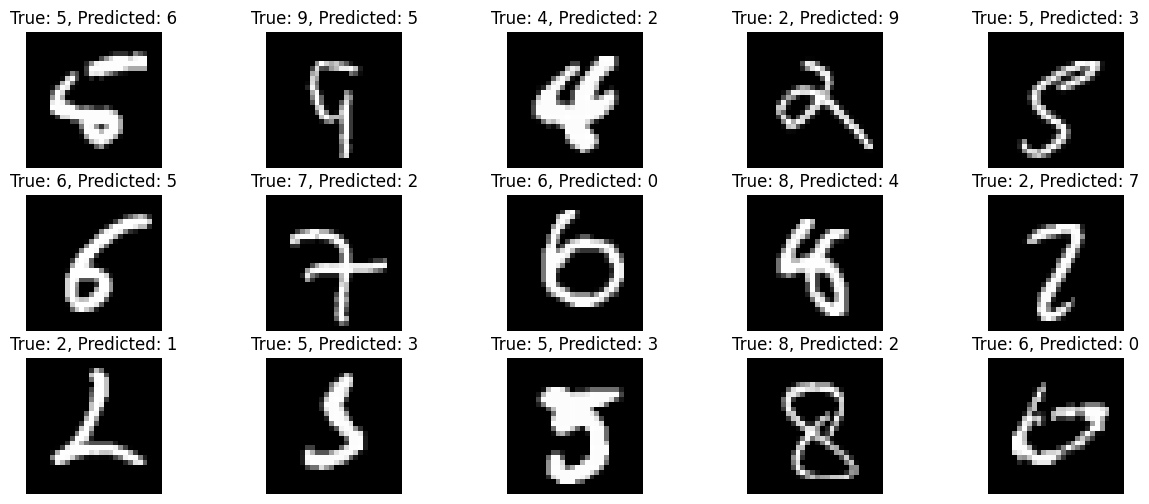

In [23]:
# Make predictions on the test set
predictions_nn_prob = model.predict(X_test)
predictions_nn = np.argmax(predictions_nn_prob, axis=1)

# Find misclassified classes
misclassified_idx = np.where(y_test != predictions_nn)[0]

# Display the first 15 misclassified images
plt.figure(figsize=(15, 6))
for i, idx in enumerate(misclassified_idx[:15]):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[idx].reshape((28, 28)), cmap='gray')
    plt.title(f'True: {y_test[idx]}, Predicted: {predictions_nn[idx]}')
    plt.axis('off')

plt.show()

In [24]:
from sklearn.metrics import classification_report

# Make predictions on the test set using the trained model
predictions_prob = model.predict(X_test)
predictions = np.argmax(predictions_prob, axis=1)

# Convert one-hot encoded labels back to categorical labels
y_test_labels = np.argmax(y_test_OHE, axis=1)

# Generate the classification report
report = classification_report(y_test_labels, predictions, output_dict=True)

# Extract precision for each class from the classification report
precisions_per_class = {str(int(cls)): report[str(int(cls))]['precision'] for cls in range(10)}

# Print the precision for each class
print('Precision per class:')
for cls, precision in precisions_per_class.items():
    print(f'Class {cls}: {precision}')

313/313 [==============================] - 11s 34ms/step
Precision per class:
Class 0: 0.9758064516129032
Class 1: 0.9885964912280701
Class 2: 0.9576271186440678
Class 3: 0.9800399201596807
Class 4: 0.9845995893223819
Class 5: 0.9742729306487695
Class 6: 0.9862869198312236
Class 7: 0.9765625
Class 8: 0.9761410788381742
Class 9: 0.974


As noted by the classification report increasing the number of epochs from 3 to 10 does not lead to a clear improvement in accuracy. When accuracy reaches a plateau, increasing the number of epochs may not lead to significant improvements, as the model has already learned most of the relevant information in the training data. the model has already gone to convergence

Increasing the number of epochs can lead to a longer training and therefore an increase in the production time of the results without necessarily improving the performance of the model. It is important to balance the trade-off between the desired accuracy and the available training time. If we want to improve the accuracy we can try the hyperparameter tuning experiments with different hyperparameters such as learning rate, convolutional filter size, number of units in dense layers, etc and uses techniques such as grid search or random search to find the optimal combination of hyperparameters.

In [25]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam, SGD
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN model function
def create_model(fc_layer_size=128, dropout=0.3, optimizer='adam', learning_rate=0.001):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(fc_layer_size, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(10, activation='softmax'))

    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    else:
        optimizer = SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define a function to calculate accuracy
def calculate_accuracy(model, X, y):
    y_pred_prob = model.predict(X)
    y_pred = np.argmax(y_pred_prob, axis=1)
    return accuracy_score(np.argmax(y, axis=1), y_pred)
# Define the parameter distributions for randomized search
param_distributions = {
    'learning_rate': [0.001, 0.01, 0.1],
    'fc_layer_size': [128, 256, 512],
    'dropout': [0.3, 0.4, 0.5]
}

# Perform random search manually
best_accuracy = 0
best_params = None
for _ in range(10):  # Number of iterations for random search
    params = {param: np.random.choice(values) for param, values in param_distributions.items()}
    model = create_model(**params)
    model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)  # Adjust batch size here
    accuracy = calculate_accuracy(model, X_test, y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

# Print the best parameters
print("Best parameters:", best_params)

313/313 [==============================] - 3s 10ms/step
Best parameters: {'learning_rate': 0.001, 'fc_layer_size': 256, 'dropout': 0.4}


In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils import to_categorical

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the best parameters obtained from hyperparameter tuning
best_params = {'learning_rate': 0.001, 'fc_layer_size': 512, 'dropout': 0.4}

# Define and compile the model with the best parameters
model = create_model(**best_params)
optimizer = Adam(learning_rate=best_params['learning_rate'])
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the best parameters
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
938/938 [==============================] - 86s 91ms/step - loss: 0.1703 - accuracy: 0.9481 - val_loss: 0.0568 - val_accuracy: 0.9803
Epoch 2/10
938/938 [==============================] - 74s 79ms/step - loss: 0.0594 - accuracy: 0.9818 - val_loss: 0.0438 - val_accuracy: 0.9842
Epoch 3/10
938/938 [==============================] - 71s 75ms/step - loss: 0.0403 - accuracy: 0.9874 - val_loss: 0.0339 - val_accuracy: 0.9888
Epoch 4/10
938/938 [==============================] - 71s 76ms/step - loss: 0.0305 - accuracy: 0.9903 - val_loss: 0.0330 - val_accuracy: 0.9884
Epoch 5/10
938/938 [==============================] - 71s 76ms/step - loss: 0.0223 - accuracy: 0.9924 - val_loss: 0.0316 - val_accuracy: 0.9888
Epoch 6/10
938/938 [==============================] - 72s 76ms/step - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.0373 - val_accuracy: 0.9873
Epoch 7/10
938/938 [==============================] - 69s 74ms/step - loss: 0.0150 - accuracy: 0.9953 - val_loss: 0.0338 - val_accuracy:

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get model predictions on test data
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

313/313 [==============================] - 4s 14ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix:
[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1132    1    0    0    0    1    0    0    1]
 [   1    1 1021    0    1    0    0  

313/313 [==============================] - 3s 10ms/step
CNN Accuracy: 0.9886
CNN Precision: 0.9886136915438752
CNN Consistent Accuracy: 0.9886


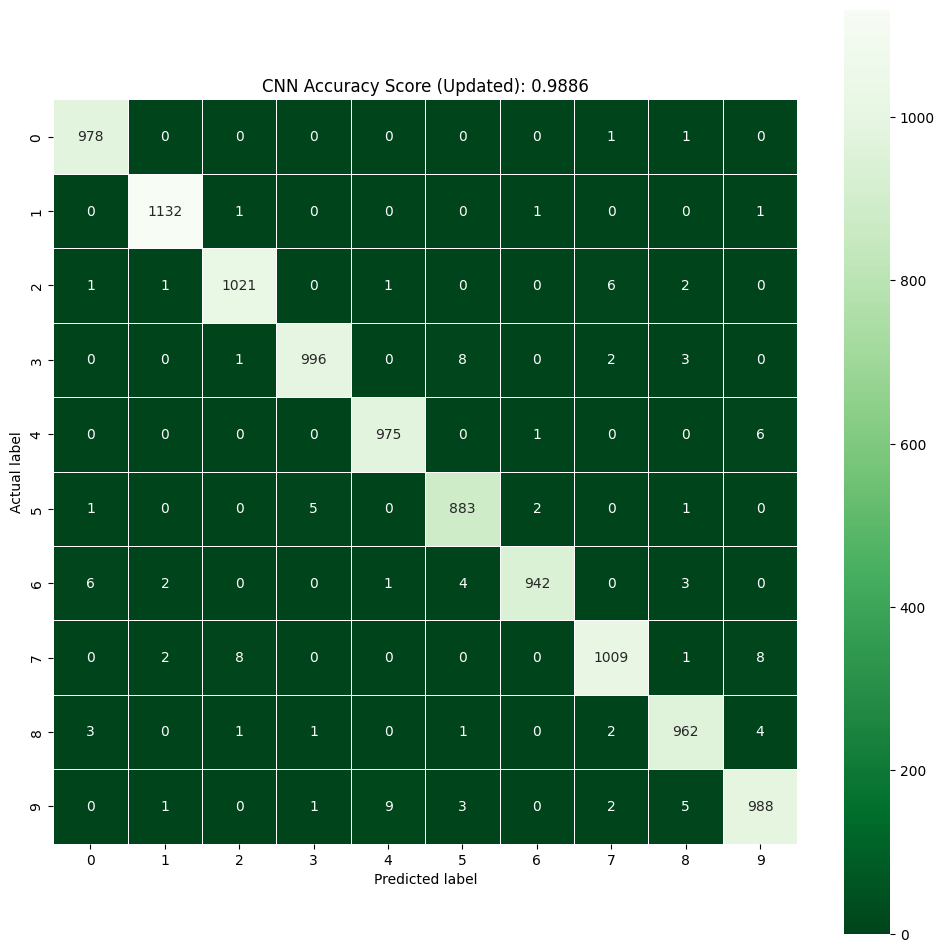

In [28]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# predict on the test set
y_pred = model.predict(X_test)

# convert predictions to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# convert one-hot encoded labels back to categorical labels
y_test_labels = np.argmax(y_test_OHE, axis=1)

# Accuracy calculation
accuracy_cnn = accuracy_score(y_test_labels, y_pred_labels)
print(f"CNN Accuracy: {accuracy_cnn}")

# Precision calculation
precision_cnn = precision_score(y_test_labels, y_pred_labels, average='weighted')
print(f"CNN Precision: {precision_cnn}")

# Assuming 'y_test_labels' is the true labels for the test set for CNN
y_true_cnn = y_test_labels[:len(y_pred_labels)]

# Calculate accuracy using the same predictions for consistency
consistent_accuracy_cnn = accuracy_score(y_true_cnn, y_pred_labels)
print(f"CNN Consistent Accuracy: {consistent_accuracy_cnn}")

# Plot confusion matrix with updated accuracy
cm_cnn = confusion_matrix(y_true_cnn, y_pred_labels)
plt.figure(figsize=(12, 12))
sns.heatmap(cm_cnn, annot=True, linewidths=.5, square=True, cmap='Greens_r', fmt='0.4g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title_cnn = 'CNN Accuracy Score (Updated): {0}'.format(consistent_accuracy_cnn)
plt.title(all_sample_title_cnn)
plt.show()

In [57]:
print(y_test_int[:10])




[7 2 1 0 4 1 4 9 5 9]


In [58]:
y_test_int = np.argmax(y_test, axis=1)
print(y_test_int)

[7 2 1 ... 4 5 6]


In [34]:
print(y_test_int.shape)

(10000,)


In [35]:
print(y_test_int.dtype)

int64


In [36]:
y_test_int = np.argmax(y_test, axis=1)

In [38]:
y_test_int = np.argmax(y_test, axis=1)

In [40]:
y_test_OHE = to_categorical(y_test)

In [41]:
y_test_int = np.argmax(y_test_OHE, axis=1)

In [59]:
print("y_test_int shape:", y_test_int.shape)
print("y_test_int data type:", y_test_int.dtype)
print("predictions_cnn shape:", predictions_cnn.shape)
print("predictions_cnn data type:", predictions_cnn.dtype)

y_test_int shape: (10000,)
y_test_int data type: int64
predictions_cnn shape: (10000,)
predictions_cnn data type: int64


it's necessary that y_test_init and prediction_cnn have the same dimension  to avoid errors


In [60]:
y_test_mono = np.argmax(y_test, axis=1)

In [64]:
print("y_test_int shape:", y_test_int.shape)
print("y_test_int data type:", y_test_int.dtype)
print("predictions_cnn shape:", predictions_cnn.shape)
print("predictions_cnn data type:", predictions_cnn.dtype)

y_test_int shape: (10000,)
y_test_int data type: int64
predictions_cnn shape: (10000,)
predictions_cnn data type: int64


In [62]:
from sklearn.metrics import classification_report

# Classification report
report = classification_report(y_test_mono, predictions_cnn)

# Classification report with the precision for each class
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.98      0.98      1135
           2       0.98      0.98      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.95      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [54]:
from sklearn.metrics import classification_report

report = classification_report(y_test_mono, predictions_cnn, output_dict=True)

# Precision for each class
precisions_per_class = {str(cls): report[str(cls)]['precision'] for cls in range(10)}

# Print the precision for each class
for cls, precision in precisions_per_class.items():
    print(f'Classe {cls}: {precision}')

Classe 0: 0.9866939611054247
Classe 1: 0.9858281665190434
Classe 2: 0.9768115942028985
Classe 3: 0.947119924457035
Classe 4: 0.9808274470232089
Classe 5: 0.9828962371721779
Classe 6: 0.9822732012513035
Classe 7: 0.9773622047244095
Classe 8: 0.9810126582278481
Classe 9: 0.9722497522299306


FINAL EVALUATION PLOT

The different accuracy and precision can be compared in the following plot

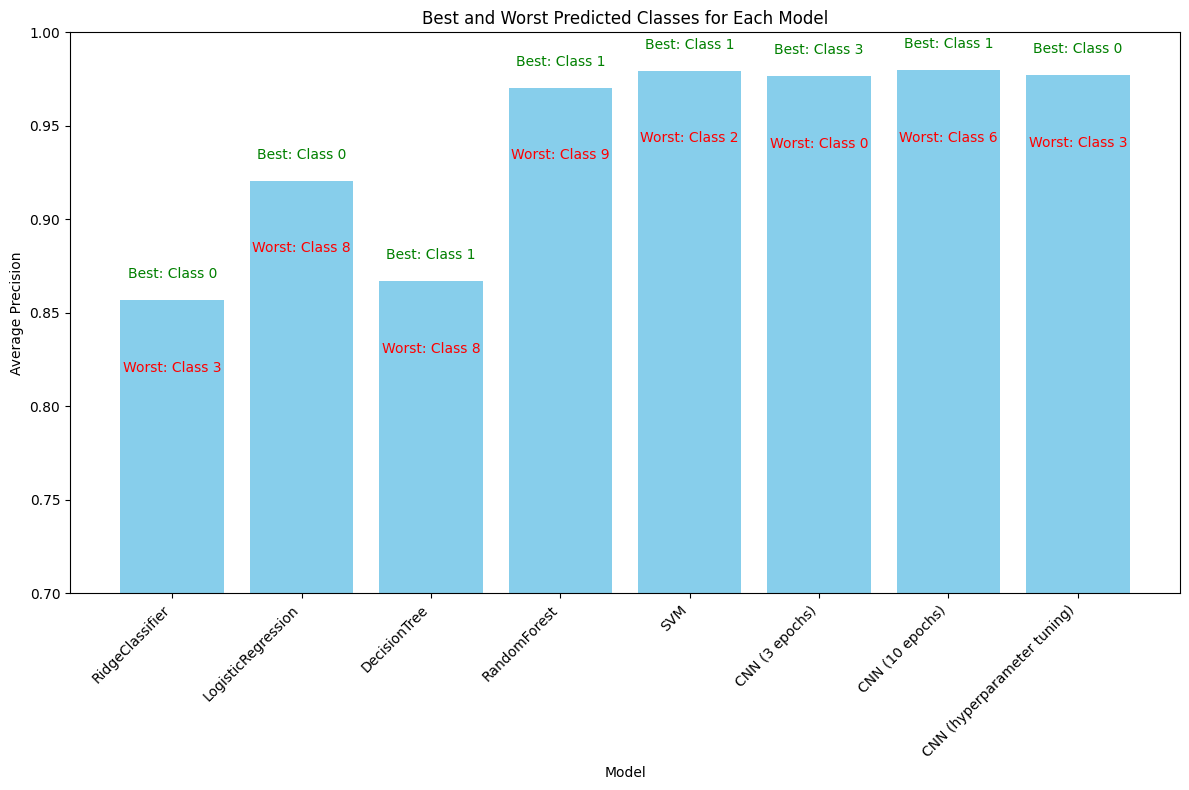

In [56]:
import matplotlib.pyplot as plt

# Define the average precision data for each model and class
models = ['RidgeClassifier', 'LogisticRegression', 'DecisionTree', 'RandomForest', 'SVM', 'CNN (3 epochs)', 'CNN (10 epochs)', 'CNN (hyperparameter tuning)']
classes = list(range(10))  # 10 classes in the MNIST dataset

# Average precision for each class for each model
precision_data = {
    'RidgeClassifier': [0.9147496617050067, 0.8218331616889805, 0.8908227848101266, 0.8176470588235294, 0.8178137651821862, 0.875, 0.897841726618705, 0.8645418326693227, 0.8368, 0.8323353293413174],
    'LogisticRegression': [0.9688385269121813, 0.9545454545454546, 0.9176300578034682, 0.9064856711915535, 0.9213313161875946, 0.9008547008547009, 0.934593023255814, 0.9350132625994695, 0.8771186440677966, 0.8910891089108911],
    'DecisionTree': [0.9380403458213257, 0.9508599508599509, 0.8290366350067843, 0.8301610541727672, 0.8643815201192251, 0.8118811881188119, 0.8967065868263473, 0.9173441734417345, 0.8023426061493412, 0.8314447592067988],
    'RandomForest': [0.9858356940509915, 0.9914004914004914, 0.9529085872576177, 0.9588235294117647, 0.9756468797564688, 0.9732888146911519, 0.9793510324483776, 0.9722222222222222, 0.9709302325581395, 0.9442857142857143],
    'SVM': [0.9887165021156559, 0.9902439024390244, 0.9677871148459384, 0.9836552748885586, 0.9744360902255639, 0.978405315614618, 0.9837758112094396, 0.9788079470198675, 0.9768451519536903, 0.9725829725829725],
    'CNN (3 epochs)': [0.956820412168793, 0.9807860262008734, 0.9794721407624634, 0.987012987012987, 0.9775051124744376, 0.9799777530589544, 0.986228813559322, 0.9672447013487476, 0.9840933191940615, 0.9673267326732673],
    'CNN (10 epochs)': [0.9739217652958877, 0.9902998236331569, 0.9862475442043221, 0.9793713163064833, 0.9796541200406917, 0.985244040862656, 0.9720207253886011, 0.9824046920821115, 0.9743326488706365, 0.9751737835153923],
    'CNN (hyperparameter tuning)': [0.9866939611054247, 0.9858281665190434, 0.9768115942028985, 0.947119924457035, 0.9808274470232089, 0.9828962371721779, 0.9822732012513035, 0.9773622047244095, 0.9810126582278481, 0.9722497522299306]
}

# Calculate the average precision for each model
avg_precisions = {model: sum(precision_data[model]) / len(precision_data[model]) for model in models}

# Find the class with the highest and lowest precision for each model
best_classes = {model: classes[precision_data[model].index(max(precision_data[model]))] for model in models}
worst_classes = {model: classes[precision_data[model].index(min(precision_data[model]))] for model in models}

# Create the graph
plt.figure(figsize=(12, 8))

# Plot the average precisions for each model
plt.bar(models, avg_precisions.values(), color='skyblue')

# Annotations for the best and worst predicted classes for each model
for i, model in enumerate(models):
    plt.text(i, avg_precisions[model] + 0.01, f'Best: Class {best_classes[model]}', ha='center', va='bottom', fontsize=10, color='green')
    plt.text(i, avg_precisions[model] - 0.04, f'Worst: Class {worst_classes[model]}', ha='center', va='bottom', fontsize=10, color='red')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Average Precision')
plt.title('Best and Worst Predicted Classes for Each Model')

# Show the graph
plt.ylim(0.7, 1.0)  # Set the lower limit of the y-axis for better visualization
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The plot represents the best and the worst class predicted by each model, on the base on the precision computed for each class for each model. The best predicted class is the 0 and 1, while An analysis of the trend of the worst predicted classes reveals a heterogeneity of classes. The heterogeneity in the worst predicted class among different models can be attributed to several factors, including the intrinsic complexity of the data: some classes may be inherently more challenging to distinguish due to visual similarity or variability among samples within a class. This complexity may vary across classes, leading to lower precision for those classes across all models.
Moreover certain models might excel in capturing specific data relationships compared to others. For instance, more complex models like neural networks may be able to capture intricate data relationships better than simpler models like linear classifiers.
We have to consider also the quantity of a class in the training and test set: if a class has limited representation in the training data or if the data is noisy or mislabeled, it can negatively impact the model's ability to accurately predict that class.


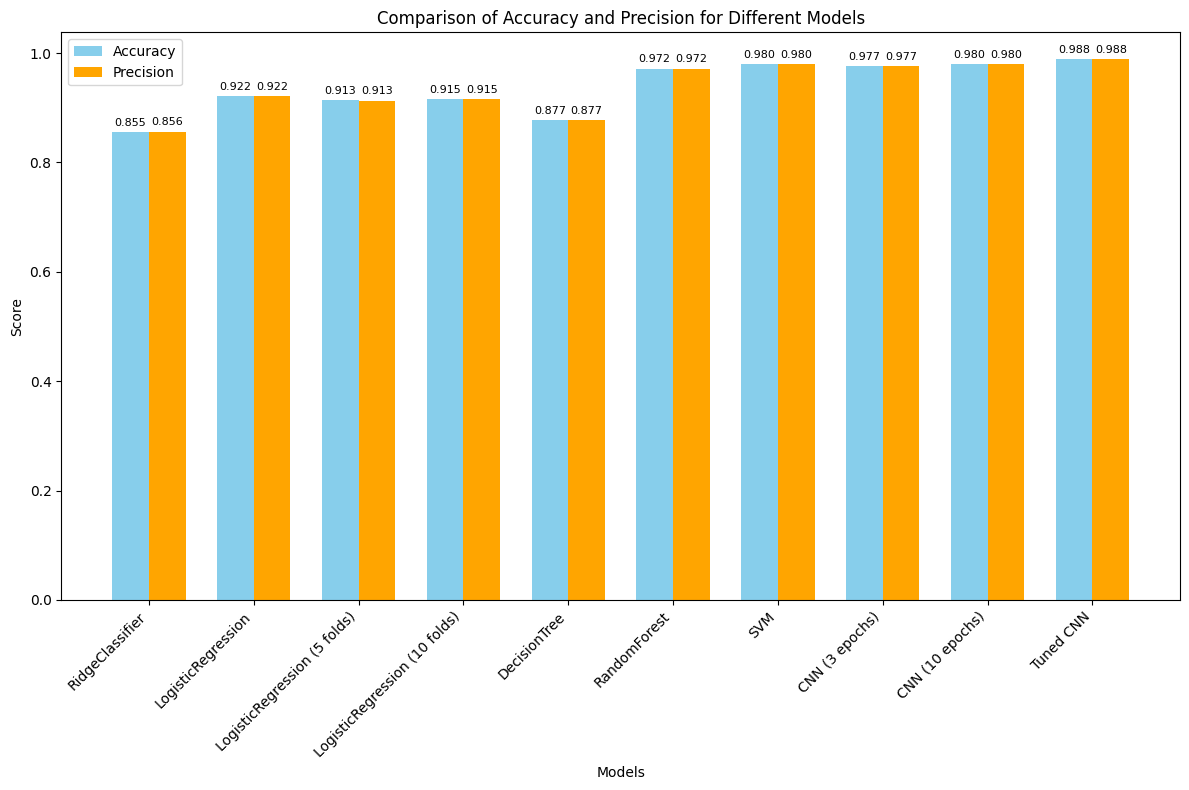

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
model_names = ['RidgeClassifier', 'LogisticRegression', 'LogisticRegression (5 folds)', 'LogisticRegression (10 folds)', 'DecisionTree', 'RandomForest', 'SVM', 'CNN (3 epochs)', 'CNN (10 epochs)', 'Tuned CNN']

# Accuracies
accuracies = [0.8552857142857143, 0.9218571428571428, 0.9134444444444444, 0.9153809523809524, 0.877, 0.9715714285714285, 0.9797142857142858, 0.9765, 0.98, 0.9884]

# Precisions
precisions = [0.8564470914216108, 0.9217672097568258, 0.9132053932621541, 0.9151700793409735, 0.8773066300744394, 0.9715954242125319, 0.9797153514281507, 0.9766299008530559, 0.980032238118118, 0.9884433654448465]

# Model index
x = np.arange(len(model_names))

# Width of the bars
width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, precisions, width, label='Precision', color='orange')

# labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Comparison of Accuracy and Precision for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

# text labels for each bar
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

From the descending order of accuracies, we can deduce that the CNN (Tuned) model achieved the highest accuracy followed by CNN (10 epochs), CNN (3 epochs), SVM, RandomForest, LogisticRegression, DecisionTree, and finally RidgeClassifier.

Here are some deductions we can make from this order:

Deep Learning Models (CNN): CNN models have shown to be the most performing among those tested.

Model Tuning: The CNN model that underwent hyperparameter tuning outperformed both the CNN with 10 epochs and 3 epochs. This demonstrates the importance of parameter tuning in improving model performance.

SVM and RandomForest Models: They follow the CNN models in terms of accuracy but are still significantly better than linear regression models and simpler classification algorithms like DecisionTree and RidgeClassifier.

Linear Models (LogisticRegression and RidgeClassifier): They have lower performance compared to tree-based models and more complex machine learning algorithms, especially when dealing with complex problems like image classification.

In summary, we can deduce that for complex problems like image classification, Deep Learning models such as CNNs tend to achieve the best performance, especially when subjected to hyperparameter tuning. However, it's important to also consider the computational cost associated with training and tuning such models.